1. [Dataset Description](README.md)
2.  <a href="#asses">Data Assessing</a>
3.  <a href="#clean">Data Cleaning</a>
    - <a href="#rename">Renaming Columns</a>
    - <a href="#dtype">Changing the data types</a>
    - <a href="#insert">Inserting New Columns </a>
    - <a href="#describe">Exploring the charcteristics of _"date_diff"_,_"age_stages"_, _"age"_, and _"hcp"_</a>
    - <a href="#insert_2">Inserting Appoint_gap Column in the dataset</a>
4.  <a href="#explore">Data Exploring</a>
# Dataset Description:
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.* ***Patientid :*** The identification number of the patient.
* ***AppointmentID:*** The identification number of the appointment _"Key Identifier"_.
* ***Gender:*** _"M"_ for Male, and _"F"_ for Female.
* ***ScheduleDay:*** Tells us on what day the patient set up their appointment.
* ***Age:*** The patient's age.
* ***Neighbourhood:*** Indicates the location of the hospital
* ***Scholaeship:*** Indicates whether or not the patient is enro in Brasilian welfare program [Bolsa Família](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&source=editors&ust=1724087817860577&usg=AOvVaw2Q_qcF1o_XPTswzKDAbl1Q) .Where, _Enrolled = 1_ and _Not Enroled = 0_.
* ***Hipertension (HTN):*** Patients with high blood pressure. Where, _True = 1_ and _False = 0_.
* ***Diabetes (DM):*** Patients with high blood sugar levels. Where, _True = 1_ and _False = 0_.
* ***Alcoholism (AUD):*** Alcohol use disorder. Where, _True = 1_ and _False = 0_.
* ***Handicap (HCP):*** an illness, injury, or condition that makes it difficult for someone to do some things that other people do. Where, _True = [1,2,3,4]_ and _False = 0_.
* ***SMS_received:*** 1 or more messages sent to the patient. Where, _True = 1_ and _False = 0_.
* ***No-show:*** _"No"_ if the patient showed up to their appointment,and _"Yes"_ if they did not show up.



In [1277]:
# Importing Liberaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='asses'></a>
## 1- Data Assessing:

In [1279]:
# Exploring data characteristics of the dataset:
df= pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [1280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [1281]:
print('The dataset has a shape of:',df.shape)

The dataset has a shape of: (110527, 14)


In [1282]:
if df.isna().sum().sum()== 0:
    print ('No NULL values in this dataset')
else:
    print('Total number of Null Values is: ',df.isna().sum().sum())

No NULL values in this dataset


In [1283]:
if df.duplicated().sum()== 0:
    print ('No DUPLICATED values in this dataset')
else:
    print('Total number of Duplicated Values is: ',df.duplicated().sum())

No DUPLICATED values in this dataset


In [1284]:
print('The number of UNIQUE values in this dataset:\n\n',df.nunique())

The number of UNIQUE values in this dataset:

 PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


In [1285]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [1286]:
print('"Gender" Categories:        ',df.Gender.unique())
print('\n"Scolarship" Categories:    ', df.Scholarship.unique())
print('\n"Hipertension" Category:    ', df.Hipertension.unique())
print('\n"Diabetes" Category:        ', df.Diabetes.unique())
print('\n"Alcoholism" Category:      ', df.Alcoholism.unique())
print('\n"Handcap" Category:         ', df.Handcap.unique())
print('\n"SMS_received" Category:    ', df['SMS_received'].unique())
print('\n"No-show" Category:         ', df['No-show'].unique())

"Gender" Categories:         ['F' 'M']

"Scolarship" Categories:     [0 1]

"Hipertension" Category:     [1 0]

"Diabetes" Category:         [0 1]

"Alcoholism" Category:       [0 1]

"Handcap" Category:          [0 1 2 3 4]

"SMS_received" Category:     [0 1]

"No-show" Category:          ['No' 'Yes']


In [1287]:
#The describtive statistics for the whole dataset:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [1288]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [1289]:
# Count of patients according to Gender Clasification:
df.groupby('Gender').PatientId.nunique().reset_index().rename(columns={'PatientId':'count_patient'}).style.hide()

Gender,count_patient
F,40046
M,22253


In [1290]:
# Count of Patients Based on Scholarship Grants:
df.groupby('Scholarship').PatientId.nunique().reset_index().rename(columns={'PatientId':'count_patient'}).style.hide()

Scholarship,count_patient
0,56511
1,5788


In [1291]:
# Count of Patients Based on Hypertension Diagnosis:
df.groupby('Hipertension').PatientId.nunique().reset_index().rename(columns={'PatientId':'count_patient'}).style.hide()

Hipertension,count_patient
0,50057
1,12242


In [1292]:
# Count of Patients Based on Diabetes Diagnosis
df.groupby('Diabetes').PatientId.nunique().reset_index().rename(columns={'PatientId':'count_patient'}).style.hide()

Diabetes,count_patient
0,57883
1,4416


In [1293]:
# Count of Patients Based on Their Alcohol-Related Problems:
df.groupby('Alcoholism').PatientId.nunique().reset_index().rename(columns={'PatientId':'count_patient'}).style.hide()

Alcoholism,count_patient
0,60793
1,1506


In [1294]:
# Count of Patients Based on Their Handicap Status (if any):
df.groupby('Handcap').PatientId.nunique().reset_index().rename(columns={'PatientId':'count_patient'}).style.hide()

Handcap,count_patient
0,61166
1,1025
2,99
3,6
4,3


In [1295]:
# Count of Patients Based on Receiving Appointment Confirmation Messages:
df.groupby('SMS_received').AppointmentID.nunique().reset_index().rename(columns={'PatientId':'count_patient'}).style.hide()

SMS_received,AppointmentID
0,75045
1,35482


In [1296]:
# Count of Patients Based on Attending Their Scheduled Appointment:
df.groupby('No-show').AppointmentID.nunique().reset_index().rename(columns={'PatientId':'count_patient'}).style.hide()

No-show,AppointmentID
No,88208
Yes,22319


<a id='clean'></a>
## 2 - Data Cleaning:

<a id='rename'></a>
### a) Renaming Column labels:
   
In order to investigate easily the columns  label nees to be changedas follows:
   * _PatientId_          to     ***patient_id***
   * _AppointmentID_      to     ***appoint_id***
   * _Gender_             to     ***gender***
   * _ScheduledDay_       to     ***sched_day***
   * _AppointmentDay_     to     ***appoint_day***
   * _Age_                to     ***age***
   * _Neighbourhood_      to     ***neighbourhood***
   * _Scholarship_        to     ***scholarship***
   * _Hipertension_       to     ***htn***
   * _Diabetes_           to     ***dm***
   * _Alcoholism_         to     ***aud***
   * _Handcap_            to     ***hcp***
   * _SMS_received_       to     ***sms_received***
   * _No-show_            to     ***no_show***


In [1299]:
# Renaming the dataset columns:
df = df.rename(columns = {"PatientId":"patient_id", "AppointmentID":"appoint_id", 'Gender':"gender","ScheduledDay":"sched_day",
                           "AppointmentDay":"appoint_day","Age":"age", "Neighbourhood":"neighbourhood", "Scholarship":"scholarship",
                           "Hipertension":"htn", "Diabetes":"dm", "Alcoholism":"aud","Handcap":"hcp", "SMS_received":"sms_received","No-show":"no_show"})
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='dtype'></a>
### b) Changing the data types of:
- _patient_id_ to ***integer***
- _sched_day_ & _appoint_day_ to ***date format***

In [1301]:
# Changing the data types:
df['patient_id'] = df['patient_id'].astype('int64')
df['sched_day'] = pd.to_datetime(df['sched_day']).dt.date
df['appoint_day'] = pd.to_datetime(df['appoint_day']).dt.date
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [1302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   patient_id     110527 non-null  int64 
 1   appoint_id     110527 non-null  int64 
 2   gender         110527 non-null  object
 3   sched_day      110527 non-null  object
 4   appoint_day    110527 non-null  object
 5   age            110527 non-null  int64 
 6   neighbourhood  110527 non-null  object
 7   scholarship    110527 non-null  int64 
 8   htn            110527 non-null  int64 
 9   dm             110527 non-null  int64 
 10  aud            110527 non-null  int64 
 11  hcp            110527 non-null  int64 
 12  sms_received   110527 non-null  int64 
 13  no_show        110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


<a id='insert'></a>
### c) Inserting New Columns in the dataset:
- ***date_diff:*** To measure the difference in days between  _The Schedule Date_ and _The Appointment Date_.
- ***age_stages:*** groupping the _age_ column according to the different stages of human life, as follows:
    - **child:** Ages from _0_ to _12_
    - **teenage:** Ages greater than _12_ to _21_
    - **adult:** Ages greater than _21_ to _40_
    - **middle_age:** Ages greater than _40_ to _65_
    - **elderly:** Ages greater than _65_
  


In [1304]:
# Inserting the "date_diff" column:
df['date_diff']= (df['appoint_day']- df['sched_day']).dt.days
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show,date_diff
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0


In [1305]:
# relocating the "date_diff" column to be in the 5th column:
df.insert(5,'date_diff',df.pop('date_diff'))
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [1306]:
# Inserting the "age_stages" column:
df['age_stages']= ['child' if x <= 12
                   else 'teenage' if 12 < x <= 21
                   else 'adult' if 21 < x <= 40
                   else 'middle_aged' if 40 < x <= 65
                   else 'elderly' for x in df['age']]
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show,age_stages
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No,middle_aged


In [1307]:
# relocating the "age_stages" column to be in the 6th column:
df.insert(6,'age_stages',df.pop('age_stages'))
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,middle_aged,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='describe'></a>
### d) Exploring the charcteristics of _"date_diff"_,_"age_stages"_, _"age"_, and _"hcp"_  :


#### 1. ***date_diff:*** 
- Applying descriptive statistics for further investigation.
- ***Note:***
     - The **sched_day** should occur before the **appoint_day** (_i.e.,_ appoint_day > sched_day)
     



In [1310]:
# Exploring date_diff column:
df.date_diff.describe().reset_index().rename(columns={'index':'stat','date_diff': 'amount'}).style.format({'amount':'{:,.0f}'})

,stat,amount
0,count,"110,527"
1,mean,10
2,std,15
3,min,-6
4,25%,0
5,50%,4
6,75%,15
7,max,179


In [1311]:
# Determining the dates where the schedule dates were after the appointment dates:
df.query('date_diff<0').iloc[:,3:6]

,sched_day,appoint_day,date_diff
27033,2016-05-10,2016-05-09,-1
55226,2016-05-18,2016-05-17,-1
64175,2016-05-05,2016-05-04,-1
71533,2016-05-11,2016-05-05,-6
72362,2016-05-04,2016-05-03,-1


In [1312]:
# Adjusting those appointment dates to be the same as the schedule dates:
df['appoint_day']=np.where(df['appoint_day']<df['sched_day'],df['sched_day'],df['appoint_day'])
df['date_diff']= (df['appoint_day']- df['sched_day']).dt.days
time_stats=df.date_diff.describe().reset_index().rename(columns={'index':'stat','date_diff': 'amount'}).style.format({'amount':'{:,.0f}'})
time_stats

,stat,amount
0,count,"110,527"
1,mean,10
2,std,15
3,min,0
4,25%,0
5,50%,4
6,75%,15
7,max,179


In [1313]:
# Determining the most frequent date_diff:
print(f'The most frequent date diff is {df.date_diff.value_counts().idxmax()} day(s)')

The most frequent date diff is 0 day(s)


#### 2. ***age_stages:*** 
- Checking if a patient’s ID is repeated across two categories instead of just one.
- ***Note:***
  - Sometimes, due to the time span of the dataset, a patient’s age may shift between categories. For instance, if a patient was initially recorded as 12 years old (categorized as a child), and later, after a considerable time gap, is recorded as 13 (categorized as a teenager).


In [1315]:
# The number of patients (Unique):
patient_count=df.patient_id.nunique()
print(f'The Total Number of Patients is {patient_count} Patients\n')

# The number of patients when classified into categories (Unique):
patient_count_category=df.groupby('age_stages').patient_id.nunique().sum()
print(f'The Total Number of Patients (when categorized) is {patient_count_category} Patients\n')

# The number of Patients that are repeated in 2 categories:
print(f'The Difference = {patient_count_category - patient_count} Patients')

The Total Number of Patients is 62299 Patients

The Total Number of Patients (when categorized) is 62352 Patients

The Difference = 53 Patients


In [1316]:
# Determining the number of patients that are recorded in two categories: 
c_patient = df.query('age_stages == "child"').patient_id.unique() 
t_patient= df.query('age_stages=="teenage"').patient_id.unique()
a_patient = df.query('age_stages == "adult"').patient_id.unique()  
m_patient= df.query('age_stages=="middle_aged"').patient_id.unique()
e_patient = df.query('age_stages == "elderly"').patient_id.unique()  

repeated_1 = set(c_patient).intersection(t_patient)
repeated_2 = set(t_patient).intersection(a_patient)
repeated_3 = set(a_patient).intersection(m_patient)
repeated_4 = set(m_patient).intersection(e_patient)

print(f'''repeated patients number:\n\n -Child & Teenage = {len(repeated_1)} Patients\n -Teenage & Adult = {len(repeated_2)} Patients
 - Adult & Middle Aged = {len(repeated_3)} Patients \n - Middle_aged & Elderly = {len(repeated_4)} Patients''')

repeated patients number:

 -Child & Teenage = 12 Patients
 -Teenage & Adult = 16 Patients
 - Adult & Middle Aged = 13 Patients 
 - Middle_aged & Elderly = 12 Patients


In [1317]:
# Replacing the category of repeated patients to be the same as recorded at the begining:
# (Sine the change in age was 1 year)
df.loc[df['patient_id'].isin(repeated_1), 'age_stages'] = 'child'
df.loc[df['patient_id'].isin(repeated_2), 'age_stages'] = 'teenage'
df.loc[df['patient_id'].isin(repeated_3), 'age_stages'] = 'adult'
df.loc[df['patient_id'].isin(repeated_4), 'age_stages'] = 'middle_aged'

In [1318]:
# The amended number of patients when classified into categories (Unique):
patient_count_category=df.groupby('age_stages').patient_id.nunique().sum()
print(f'The Total Number of Patients (when categorized) is {patient_count_category} Patients')

The Total Number of Patients (when categorized) is 62299 Patients


#### 3. ***age:*** 
- Investigating the cause of negative values that appeared in the minimum value during descriptive statistics.
- ***Note:***
  -   Since the data type for age is an integer, ages less than one year ***(in months)*** are recorded as **0** years

In [1320]:
# Descriptive statistics for age:
df.age.describe().reset_index().style.format({'age':'{:,.0f}'})

,index,age
0,count,"110,527"
1,mean,37
2,std,23
3,min,-1
4,25%,18
5,50%,37
6,75%,55
7,max,115


In [1321]:
df.query("age < 0")

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,0,child,-1,ROMÃO,0,0,0,0,0,0,No


In [1322]:
# replacing the value of -1 years with 1:
df.age= np.where(df.age< 0,1,df.age)

In [1323]:
df.age.describe().reset_index().style.format({'age':'{:,.0f}'})

,index,age
0,count,"110,527"
1,mean,37
2,std,23
3,min,0
4,25%,18
5,50%,37
6,75%,55
7,max,115


#### 3. ***hcp:*** 
 - Handicap (HCP): an illness, injury, or condition that makes it difficult for someone to do some things that other people do. Where, True = [1,2,3,4] and False = 0.
 - ***Note:***
     - The dataset description does not clarify whether 1 indicates the mildest level of handicap and 4 the most severe, or if it's the other way around.
     - Since the total number of patients classified under handicap levels 1, 2, 3, and 4 is 1,133, representing less than 2% of the total, it would be more practical to combine these categories into a single classification.

In [1325]:
# Identifying the Count of Patients with a Handicap:
df.groupby('hcp').patient_id.nunique().reset_index().rename(columns={'patient_id':"patient_count"})

,hcp,patient_count
0,0,61166
1,1,1025
2,2,99
3,3,6
4,4,3


In [1326]:
# Replacing 2,3,& 4 with 1:
df.hcp= np.where(df.hcp > 1,1,df.hcp)

In [1327]:
# Adjusted Patients with a Handicap:
df.groupby('hcp').patient_id.nunique().reset_index().rename(columns={'patient_id':"patient_count"})

,hcp,patient_count
0,0,61166
1,1,1133


<a id='insert_2'></a>
### e) Inserting appoint_gap column:
- ***appoint_gap:*** groupping the _date_diff_ column according to the different gaps between _Schedule Date_ and _Appointment Date_
  (According to the descriptive statistics made above), as follows:
    - **same_day:** _0_ day.
    - **narrow_gap:** Days more than _0_ to _4_ days.
    - **moderate_gap:** Days more than _4_ to _15_ days.
    - **long_gap:** Days more than _15_.
  


In [1329]:
# Inserting the "appoint_gap" column:
df['appoint_gap']= ['same_day' if x == 0 
                    else 'narrow_gap' if 0 < x <= 4 
                    else 'moderate_gap' if 4 < x <= 15 
                    else 'long_gap' for x in df.date_diff]
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show,appoint_gap
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,middle_aged,62,JARDIM DA PENHA,0,1,0,0,0,0,No,same_day


In [1330]:
# relocating the "appoint_gap" column to be in the 6th column:
df.insert(6,'appoint_gap',df.pop('appoint_gap'))
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,appoint_gap,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,same_day,middle_aged,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [1331]:
# Exploring the charcteristics of the amended dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   patient_id     110527 non-null  int64 
 1   appoint_id     110527 non-null  int64 
 2   gender         110527 non-null  object
 3   sched_day      110527 non-null  object
 4   appoint_day    110527 non-null  object
 5   date_diff      110527 non-null  int64 
 6   appoint_gap    110527 non-null  object
 7   age_stages     110527 non-null  object
 8   age            110527 non-null  int64 
 9   neighbourhood  110527 non-null  object
 10  scholarship    110527 non-null  int64 
 11  htn            110527 non-null  int64 
 12  dm             110527 non-null  int64 
 13  aud            110527 non-null  int64 
 14  hcp            110527 non-null  int64 
 15  sms_received   110527 non-null  int64 
 16  no_show        110527 non-null  object
dtypes: int64(10), object(7)
memory usage: 14.3+ MB


<a id='explore'></a>
## 2 - Data Exploring:

In [1333]:
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,appoint_gap,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,same_day,middle_aged,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [1334]:
# Exploring Gender Column:
df.groupby('gender').patient_id.nunique().reset_index().rename(columns={'index':'gender','pacient_id':'count'}).style.hide()


gender,patient_id
F,40046
M,22253


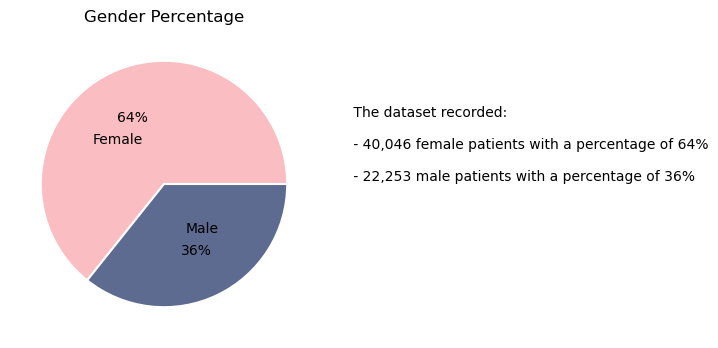

In [1335]:
x=df.groupby('gender').patient_id.nunique()

label = 'Female','Male'

text = ''' The dataset recorded:\n\n - 40,046 female patients with a percentage of 64%\n
 - 22,253 male patients with a percentage of 36%'''

plt.subplots(figsize = (4,4))
plt.pie(x, labels=label, colors= ['#f9bdc2','#5e6b91'], autopct='%1.0f%%',labeldistance=.4, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
plt.title('Gender Percentage')
plt.text(1.5,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');


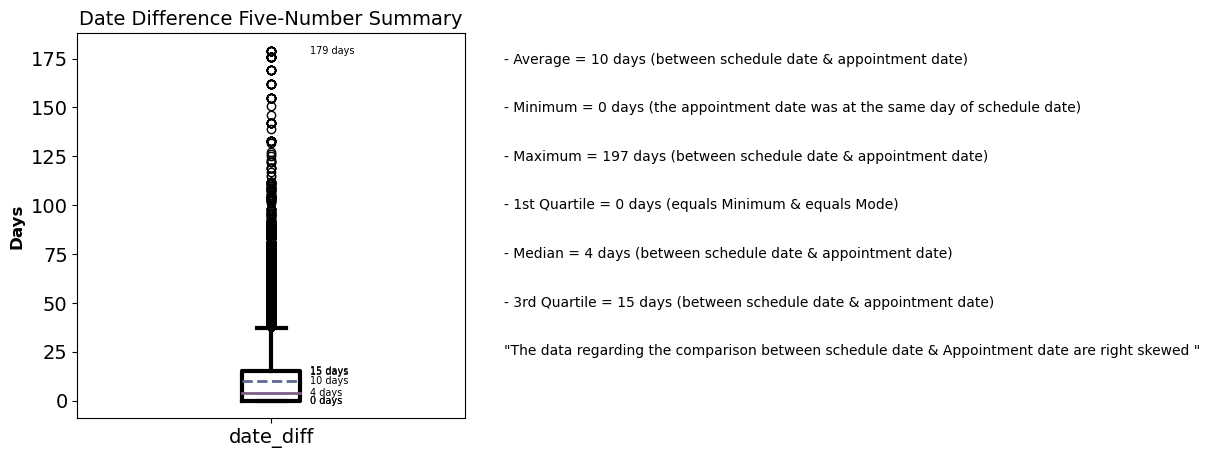

In [1336]:
# Exploring the date_diff:
x= df.date_diff

time_stats =df.date_diff.describe().reset_index().rename(columns={'index':'stat','date_diff': 'amount'})

notes= '''- Average = 10 days (between schedule date & appointment date)\n\n
- Minimum = 0 days (the appointment date was at the same day of schedule date)\n\n
- Maximum = 197 days (between schedule date & appointment date)\n\n
- 1st Quartile = 0 days (equals Minimum & equals Mode)\n\n
- Median = 4 days (between schedule date & appointment date)\n\n
- 3rd Quartile = 15 days (between schedule date & appointment date)\n\n
"The data regarding the comparison between schedule date & Appointment date are right skewed "'''

plt.subplots(figsize = (5,5))
plt.boxplot( x,showmeans = True, meanline  = True,showcaps = True,medianprops={ "color" : "#805d87","linewidth": 2},
            boxprops={"color":"black","linewidth": 3},whiskerprops={"color": "black", "linewidth": 3},
            capprops={"color": "black", "linewidth": 3},meanprops = {"color": "#5e6b91","linewidth": 2 })

for i, v in enumerate(time_stats.iloc[1:,1]):
  plt.text(1.1,v, f'{v:.0f} days', ha='left', va='center',fontsize=7)

plt.title('Date Difference Five-Number Summary', fontsize = 14)
plt.xticks([1],['date_diff'], fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Days',fontsize = 12, weight = 'bold')
plt.text(1.6,100,notes,ha='left',va='center',fontsize = 10, weight = 'normal');

In [1337]:
# Exploring age_stages column:
# Category Count:
age_stage_count=df.groupby(['age_stages']).patient_id.nunique().reset_index().rename(columns={"patient_id":"count"})
age_stage_count.sort_values('count').style.hide()


age_stages,count
teenage,6962
elderly,7711
child,12675
adult,14897
middle_aged,20054


In [1338]:
# Calculating age averages of each category:
avg_age=df.groupby('age_stages').age.mean().reset_index().rename(columns={'age':'avg_age'})
avg_age.sort_values('avg_age').style.hide().format({'avg_age':'{:,.2f}'})

age_stages,avg_age
child,4.98
teenage,17.27
adult,31.29
middle_aged,52.91
elderly,74.73


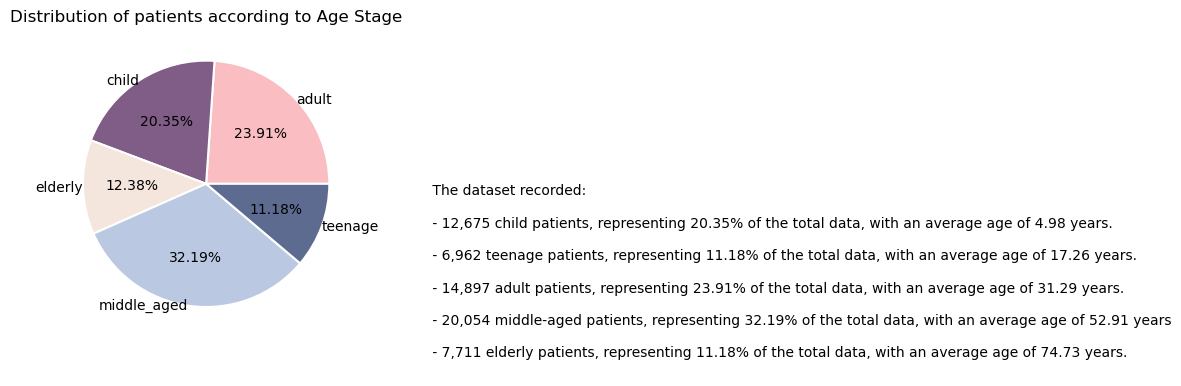

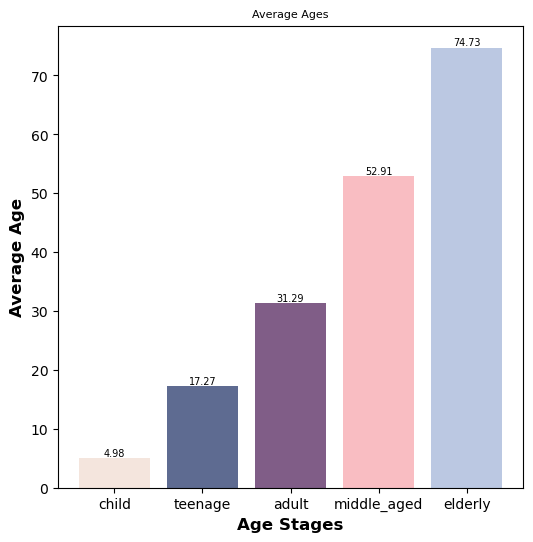

In [1339]:
# Exploring Counts & Averages of age_stages by visualization:

notes = ''' The dataset recorded:\n\n - 12,675 child patients, representing 20.35% of the total data, with an average age of 4.98 years.\n
 - 6,962 teenage patients, representing 11.18% of the total data, with an average age of 17.26 years.\n
 - 14,897 adult patients, representing 23.91% of the total data, with an average age of 31.29 years.\n
 - 20,054 middle-aged patients, representing 32.19% of the total data, with an average age of 52.91 years\n
 - 7,711 elderly patients, representing 11.18% of the total data, with an average age of 74.73 years.\n'''

# Distribution of patients according to Age Stages:
x=df.groupby(['age_stages']).patient_id.nunique()

plt.subplots(figsize = (4,4))
plt.pie(x,labels = age_stage_count.age_stages,  colors= ['#f9bdc2','#805d87','#f4e5dd','#bbc8e2','#5e6b91'], autopct='%1.2f%%',labeldistance=1,pctdistance=.6,
        wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
plt.title('Distribution of patients according to Age Stage')
plt.text(1.8,0,notes,ha='left',va='top',fontsize = 10, weight = 'normal')
plt.show();

# Average Ages:
x=avg_age.sort_values('avg_age').age_stages.to_list()
y=avg_age.sort_values('avg_age').avg_age.to_list()

plt.subplots(figsize = (6,6))
plt.bar(x,y,color= ['#f4e5dd','#5e6b91','#805d87','#f9bdc2','#bbc8e2'], alpha = 1)

for i, v in enumerate(avg_age.sort_values('avg_age').avg_age):
  plt.text(i,v, f"{v:.2f}", ha='center', va='bottom',fontsize=7)

plt.title('Average Ages', fontsize = 8)
plt.xticks(fontsize = 10, rotation = 0)
plt.yticks(fontsize = 10)
plt.xlabel('Age Stages',fontsize = 12, weight = 'bold')
plt.ylabel('Average Age',fontsize = 12, weight = 'bold')
plt.show();


In [1340]:
# Category count when classified into gender:
count_stages_gender=df.groupby(['age_stages','gender']).patient_id.nunique().reset_index().rename(columns={'patient_id':'count'})
count_stages_gender.sort_values('age_stages').style.hide()


age_stages,gender,count
adult,F,10563
adult,M,4334
child,F,6156
child,M,6519
elderly,F,5129
elderly,M,2582
middle_aged,F,13641
middle_aged,M,6413
teenage,F,4557
teenage,M,2405


In [1341]:
# Category averages when classifies by gender:
avg_age_gender=df.groupby(['age_stages','gender']).age.mean().reset_index().rename(columns={'age':'average_age'})
avg_age_gender.sort_values('average_age').style.hide().format({'average_age':'{:,.2f}'})

age_stages,gender,average_age
child,F,4.95
child,M,5.00
teenage,M,16.72
teenage,F,17.54
adult,F,31.14
adult,M,31.68
middle_aged,F,52.83
middle_aged,M,53.11
elderly,M,74.60
elderly,F,74.79


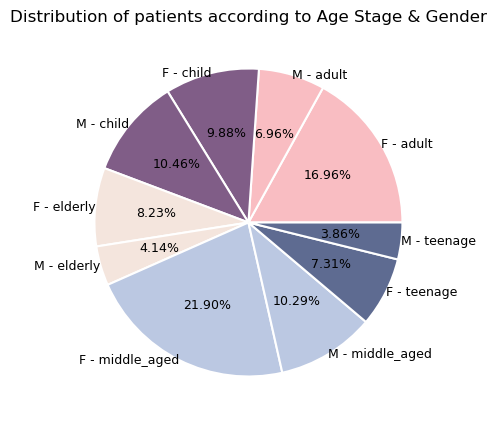

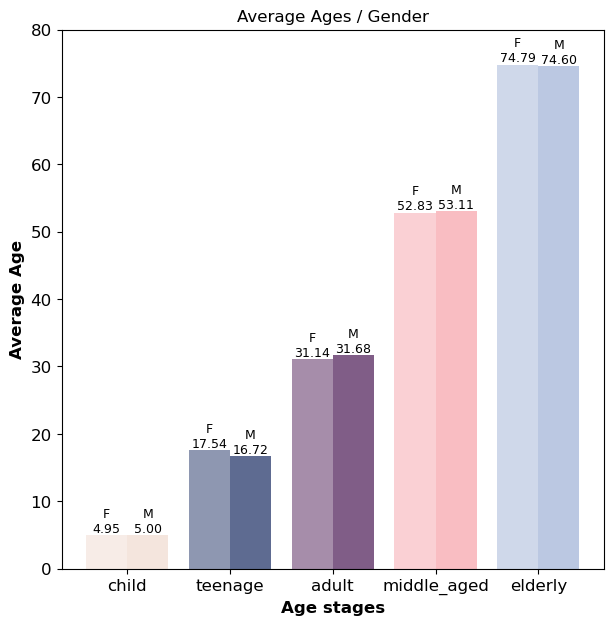

In [1342]:
# Visualizing counts & averages of age_stages when classified by gender:
# Distribution of Patients according to Age Stages & Gender:
x=df.groupby(['age_stages','gender']).patient_id.nunique()

plt.subplots(figsize = (5,5))
plt.pie(x,labels = count_stages_gender.gender +" - "+ count_stages_gender.age_stages,  
        colors= ['#f9bdc2','#f9bdc2','#805d87','#805d87','#f4e5dd','#f4e5dd','#bbc8e2','#bbc8e2','#5e6b91','#5e6b91'], 
        autopct='%1.2f%%',labeldistance=1,pctdistance=.6,textprops={'fontsize': 9},
        wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )

plt.title('Distribution of patients according to Age Stage & Gender',fontsize =12)
plt.show();

# Average Ages per Gender:
stage=avg_age_gender.sort_values('average_age').age_stages.unique().tolist()
avg = avg_age_gender.sort_values('average_age').gender.tolist()
gender_f=avg_age_gender.sort_values('average_age').query('gender=="F"').average_age.tolist()
gender_m=avg_age_gender.sort_values('average_age').query('gender=="M"').average_age.tolist()

width=.4
x=np.arange(len(gender_f))
locations= x+width/2
plt.subplots(figsize = (7,7))

plt.bar(x,gender_f,width,color=['#f4e5dd','#5e6b91','#805d87','#f9bdc2','#bbc8e2'], alpha= .7)
plt.bar(x + width,gender_m,width,color=['#f4e5dd','#5e6b91','#805d87','#f9bdc2','#bbc8e2'], alpha= 1)

for i, v in enumerate(gender_f):
  plt.text(i,v, f"F\n{v:.2f}", ha='center', va='bottom',fontsize=9)

for i, v in enumerate(gender_m):
  plt.text(i+width,v, f"M\n{v:.2f}", ha='center', va='bottom',fontsize=9) 

plt.xticks(locations, stage,fontsize = 12, rotation = 0)
plt.yticks(np.arange(0,90,10),fontsize = 12)
plt.xlabel('Age stages',fontsize = 12, weight = 'bold')
plt.ylabel('Average Age',fontsize = 12, weight = 'bold')
plt.title('Average Ages / Gender', fontsize =12)
plt.show();

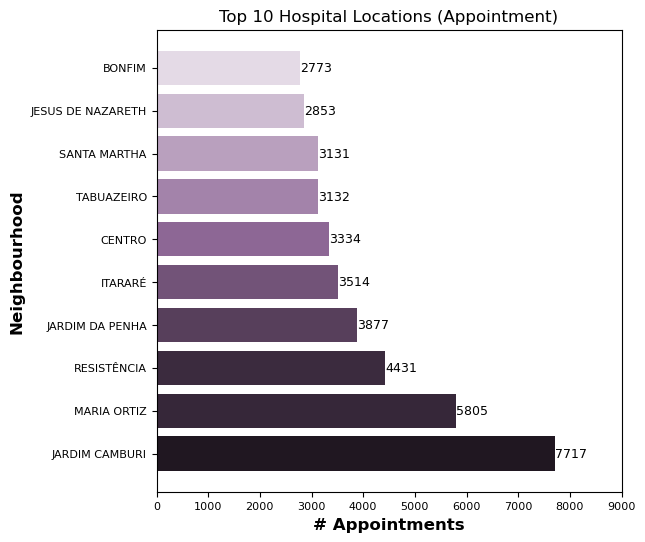

In [1343]:
# Determining the top 10 hospital locations that had the highest appointment numbers:
appointment_neibourhood=df.groupby('neighbourhood').appoint_id.count().reset_index().rename(columns={'appoint_id':'count_appointment'})
neighbourhood_a=appointment_neibourhood.sort_values('count_appointment',ascending= False).head(10).neighbourhood.to_list()
Appoint_count=appointment_neibourhood.sort_values('count_appointment',ascending= False).head(10).count_appointment.to_list()

plt.subplots(figsize = (6,6))
plt.barh(neighbourhood_a,Appoint_count,color= ['#201721','#362739','#3b2b3e','#573f5b','#725378','#8d6795','#a383aa','#b9a0be','#cebdd2','#e4dae6'])

for i, v in enumerate(Appoint_count):
  plt.text(v,i, f"{v:.0f}", ha='left', va='center',fontsize=9)

plt.title('Top 10 Hospital Locations (Appointment)', fontsize = 12)
plt.xticks(np.arange(0,10000,1000),fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('# Appointments',fontsize = 12, weight = 'bold')
plt.ylabel('Neighbourhood',fontsize = 12, weight = 'bold')
plt.show();



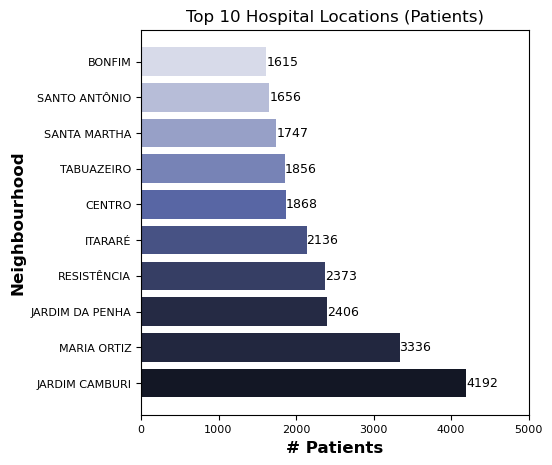

In [1344]:
# Determining the top 10 hospital locations that had the most recorded patients:
patient_neibourhood=df.groupby('neighbourhood').patient_id.nunique().reset_index().rename(columns={'patient_id':'count_patient'})
neighbourhood_p=patient_neibourhood.sort_values('count_patient',ascending= False).head(10).neighbourhood.to_list()
p_count=patient_neibourhood.sort_values('count_patient',ascending= False).head(10).count_patient.to_list()

plt.subplots(figsize = (5,5))

plt.barh(neighbourhood_p,p_count,color= ['#131725','#22273f','#252a44','#363e64','#475284','#5866a4','#7783b6','#97a0c7','#b7bdd8','#d7dae9'])

for i, v in enumerate(p_count):
  plt.text(v,i, f"{v:.0f}", ha='left', va='center',fontsize=9)

plt.title('Top 10 Hospital Locations (Patients)', fontsize = 12)
plt.xticks(np.arange(0,6000,1000),fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('# Patients',fontsize = 12, weight = 'bold')
plt.ylabel('Neighbourhood',fontsize = 12, weight = 'bold')
plt.show();


In [1345]:
# Exploring the Scholarship Column (Count of Patients With or Without Scholarships, Classified by Gender)
x=df.groupby(['scholarship','gender']).patient_id.nunique().reset_index().rename(columns={'patient_id':'patient_count'})
x

,scholarship,gender,patient_count
0,0,F,35345
1,0,M,21166
2,1,F,4701
3,1,M,1087


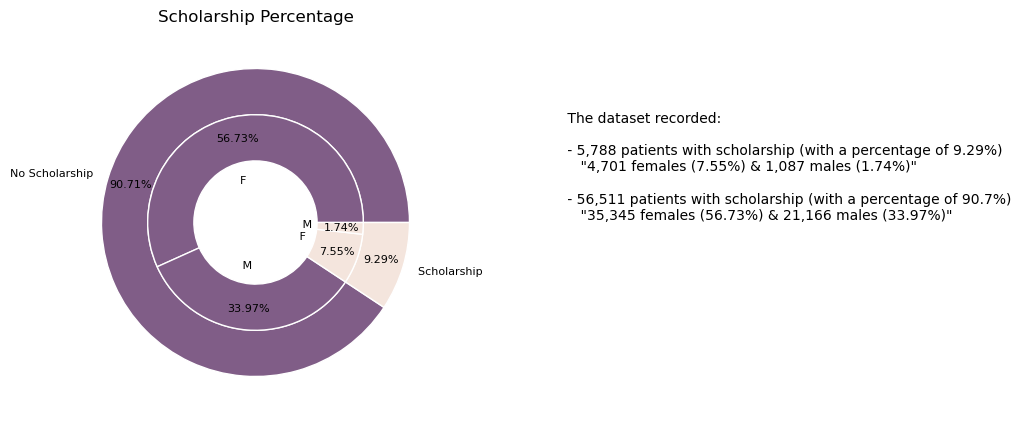

In [1346]:
# Visualizing the Scholarship Column (Count of Patients With or Without Scholarships, Classified by Gender)
x=df.groupby(['scholarship','gender']).patient_id.nunique()

size = 0.3
label_s = 'No Scholarship','Scholarship '
label_g = 'F',' M',' F',' M'
text = ''' The dataset recorded:\n\n - 5,788 patients with scholarship (with a percentage of 9.29%)
    "4,701 females (7.55%) & 1,087 males (1.74%)"\n
 - 56,511 patients with scholarship (with a percentage of 90.7%)
    "35,345 females (56.73%) & 21,166 males (33.97%)" '''

plt.subplots(figsize = (5,5))
plt.pie(x.groupby('scholarship').sum(), radius=1, colors= ['#805d87','#f4e5dd'],labels = label_s,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 8}, wedgeprops=dict(width=size, edgecolor='w'))

plt.pie(x, radius=1-size, colors= ['#805d87','#805d87','#f4e5dd','#f4e5dd'],labels=label_g,autopct='%1.2f%%',pctdistance=.8,
        labeldistance=.4,textprops={'fontsize': 8},wedgeprops=dict(width=size, edgecolor='w'))

plt.title('Scholarship Percentage')
plt.text(2,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [1347]:
# Exploring patients with or without Hypertension (HTN):
htn_count=df.groupby(['age_stages','htn','gender']).patient_id.nunique().reset_index().rename(columns={'patient_id':"count_patient"})
htn_count['pct']=htn_count['count_patient']/htn_count['count_patient'].sum()
htn_count.style.format({'pct':'{:,.2%}'})

,age_stages,htn,gender,count_patient,pct
0,adult,0,F,9938,15.95%
1,adult,0,M,4097,6.58%
2,adult,1,F,625,1.00%
3,adult,1,M,237,0.38%
4,child,0,F,6154,9.88%
5,child,0,M,6512,10.45%
6,child,1,F,2,0.00%
7,child,1,M,7,0.01%
8,elderly,0,F,1969,3.16%
9,elderly,0,M,1145,1.84%


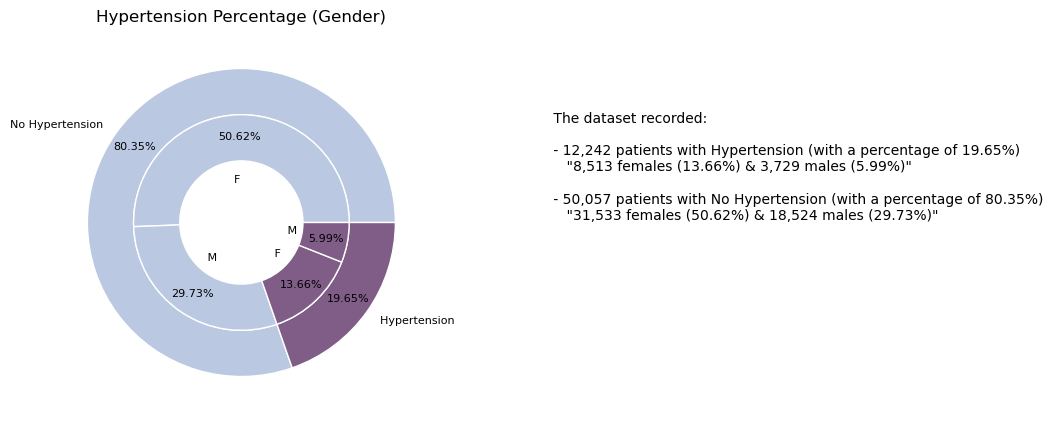

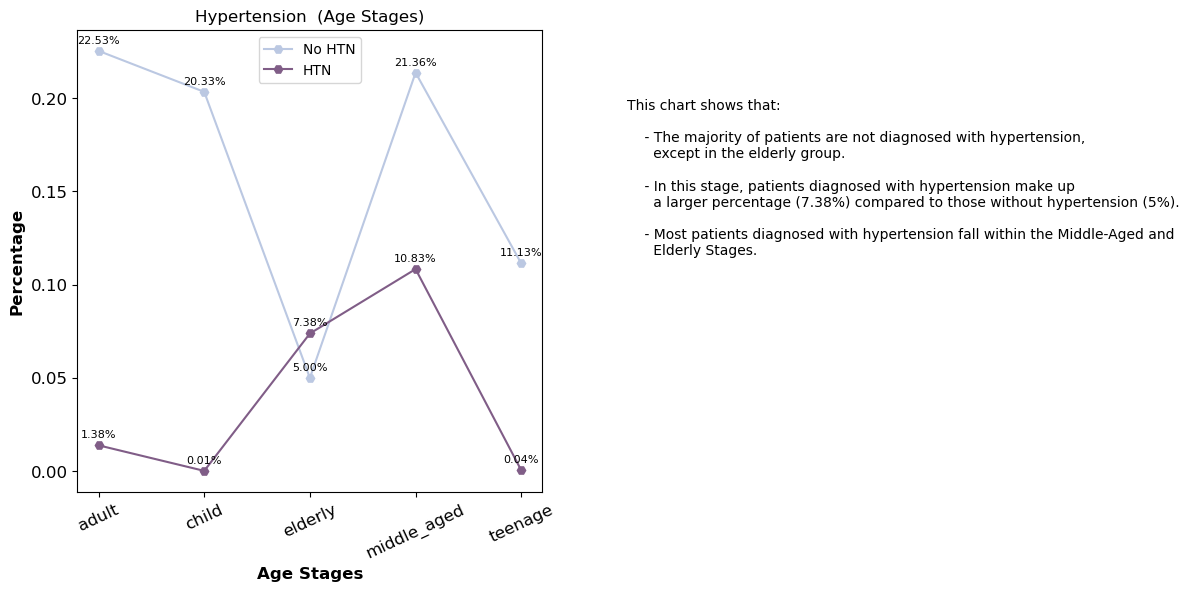

In [1348]:
# Visualizing Hypertension Column:
# By Gender:
htn_count_g=df.groupby(['htn','gender']).patient_id.nunique()

size = 0.3
label_s = 'No Hypertension','Hypertension '
label_g = 'F',' M',' F',' M'
text = ''' The dataset recorded:\n\n - 12,242 patients with Hypertension (with a percentage of 19.65%)
    "8,513 females (13.66%) & 3,729 males (5.99%)"\n
 - 50,057 patients with No Hypertension (with a percentage of 80.35%)
    "31,533 females (50.62%) & 18,524 males (29.73%)" '''

plt.subplots(figsize = (5,5))
plt.pie(htn_count_g.groupby('htn').sum(), radius=1, colors= ['#bbc8e2','#805d87'],labels = label_s,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 8}, wedgeprops=dict(width=size, edgecolor='w'))

plt.pie(htn_count_g, radius=1-size, colors= ['#bbc8e2','#bbc8e2','#805d87','#805d87'],labels=label_g,autopct='%1.2f%%',pctdistance=.8,
        labeldistance=.4,textprops={'fontsize': 8},wedgeprops=dict(width=size, edgecolor='w'))

plt.title('Hypertension Percentage (Gender)')
plt.text(2,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

# By Age Stages:
htn_count_a=df.groupby(['age_stages','htn']).patient_id.nunique().reset_index().rename(columns={'patient_id':"patient_count"})
htn_count_a['pct']=htn_count_a['patient_count']/htn_count_a['patient_count'].sum()
stages=htn_count_a.age_stages.unique().tolist()
htn_values = htn_count_a.htn.tolist()
htn_0=htn_count_a.query('htn==0').pct.tolist()
htn_1=htn_count_a.query('htn==1').pct.tolist()


note = '''This chart shows that:\n
    - The majority of patients are not diagnosed with hypertension, 
      except in the elderly group.\n
    - In this stage, patients diagnosed with hypertension make up 
      a larger percentage (7.38%) compared to those without hypertension (5%).\n
    - Most patients diagnosed with hypertension fall within the Middle-Aged and 
      Elderly Stages.'''

plt.subplots(figsize = (6,6))

plt.plot(stages,htn_0,color='#bbc8e2',marker = 'H', label= 'No HTN')
plt.plot(stages,htn_1,color='#805d87',marker = 'H', label = 'HTN')

for i, v in enumerate(htn_0):
  plt.text(i,v+.003, f"{v:.2%}", ha='center', va='bottom',fontsize=8)

for i, v in enumerate(htn_1):
  plt.text(i,v+.003, f"{v:.2%}", ha='center', va='bottom',fontsize=8) 

plt.xticks(fontsize = 12, rotation = 25)
plt.yticks(fontsize = 12)
plt.xlabel('Age Stages',fontsize = 12, weight = 'bold')
plt.ylabel('Percentage',fontsize = 12, weight = 'bold')
plt.title('Hypertension  (Age Stages)', fontsize =12)
plt.legend(loc="upper center",fontsize = 10)
plt.text(5,.2,note,ha='left',va='top',fontsize = 10, weight = 'normal')
plt.show();

In [1349]:
# Exploring Diabetic & Non-Diabetic Patients:
dm_count=df.groupby(['age_stages','dm','gender']).patient_id.nunique().reset_index().rename(columns={'patient_id':"count_patient"})
dm_count['pct']=htn_count['count_patient']/htn_count['count_patient'].sum()
dm_count.style.format({'pct':'{:,.2%}'})

,age_stages,dm,gender,count_patient,pct
0,adult,0,F,10367,15.95%
1,adult,0,M,4266,6.58%
2,adult,1,F,196,1.00%
3,adult,1,M,68,0.38%
4,child,0,F,6149,9.88%
5,child,0,M,6515,10.45%
6,child,1,F,7,0.00%
7,child,1,M,4,0.01%
8,elderly,0,F,3896,3.16%
9,elderly,0,M,2078,1.84%


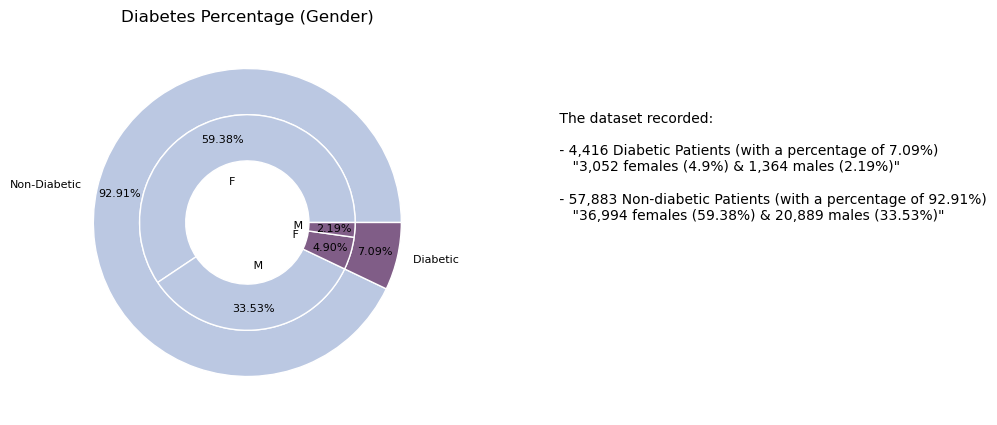

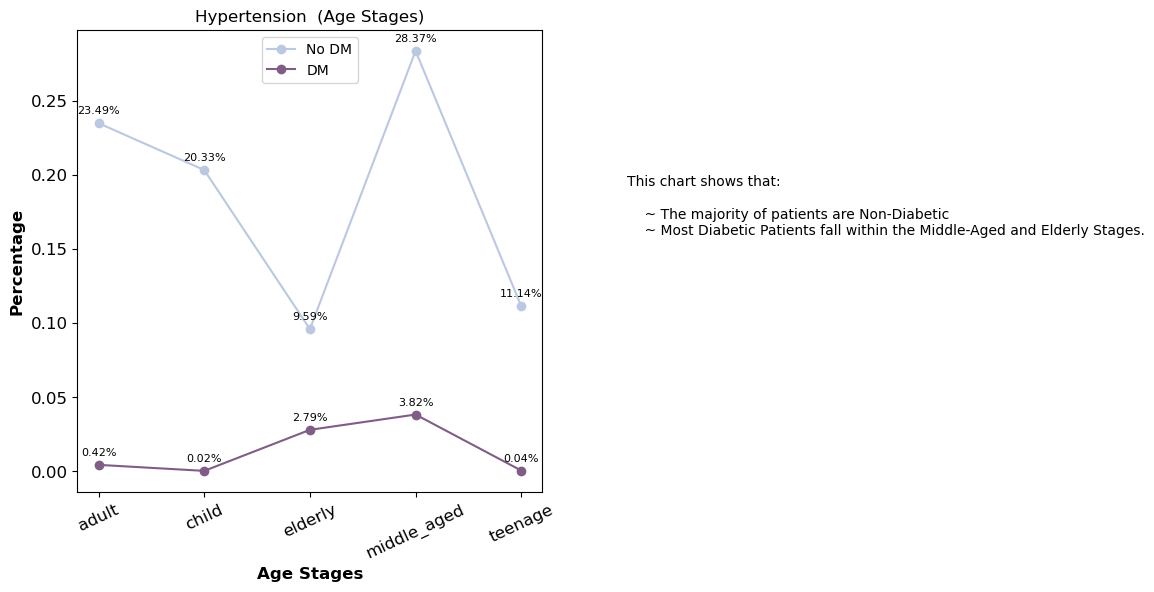

In [1350]:
# Visualizing Diabetes "dm" Column:
# By Gender:
dm_count_g=df.groupby(['dm','gender']).patient_id.nunique()

size = 0.3
label_s = 'Non-Diabetic','Diabetic '
label_g = 'F',' M',' F',' M'
text = ''' The dataset recorded:\n\n - 4,416 Diabetic Patients (with a percentage of 7.09%)
    "3,052 females (4.9%) & 1,364 males (2.19%)"\n
 - 57,883 Non-diabetic Patients (with a percentage of 92.91%)
    "36,994 females (59.38%) & 20,889 males (33.53%)" '''

plt.subplots(figsize = (5,5))

plt.pie(dm_count_g.groupby('dm').sum(), radius=1, colors= ['#bbc8e2','#805d87'],labels = label_s,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 8}, wedgeprops=dict(width=size, edgecolor='w'))

plt.pie(dm_count_g, radius=1-size, colors= ['#bbc8e2','#bbc8e2','#805d87','#805d87'],labels=label_g,autopct='%1.2f%%',pctdistance=.8,
        labeldistance=.4,textprops={'fontsize': 8},wedgeprops=dict(width=size, edgecolor='w'))

plt.title('Diabetes Percentage (Gender)')
plt.text(2,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

# By Age Stages:
dm_count_a=df.groupby(['age_stages','dm']).patient_id.nunique().reset_index().rename(columns={'patient_id':"patient_count"})
dm_count_a['pct']=dm_count_a['patient_count']/dm_count_a['patient_count'].sum()
stages=dm_count_a.age_stages.unique().tolist()
dm_values = dm_count_a.dm.tolist()
dm_0=dm_count_a.query('dm==0').pct.tolist()
dm_1=dm_count_a.query('dm==1').pct.tolist()


note = '''This chart shows that:\n
    ~ The majority of patients are Non-Diabetic
    ~ Most Diabetic Patients fall within the Middle-Aged and Elderly Stages.'''

plt.subplots(figsize = (6,6))

plt.plot(stages,dm_0,color='#bbc8e2',marker = 'o',  label= 'No DM')
plt.plot(stages,dm_1,color='#805d87',marker = 'o',  label = 'DM')

for i, v in enumerate(dm_0):
  plt.text(i,v+.005, f"{v:.2%}", ha='center', va='bottom',fontsize=8)

for i, v in enumerate(dm_1):
  plt.text(i,v+.005, f"{v:.2%}", ha='center', va='bottom',fontsize=8) 

plt.xticks(fontsize = 12, rotation = 25)
plt.yticks(fontsize = 12)
plt.xlabel('Age Stages',fontsize = 12, weight = 'bold')
plt.ylabel('Percentage',fontsize = 12, weight = 'bold')
plt.title('Hypertension  (Age Stages)', fontsize =12)
plt.legend(loc="upper center",fontsize = 10)
plt.text(5,.2,note,ha='left',va='top',fontsize = 10, weight = 'normal')
plt.show();

In [1351]:
# Exploring patients with alcohol-related problems:
aud_count=df.groupby(['age_stages','aud','gender']).patient_id.nunique().reset_index().rename(columns={'patient_id':"count_patient"})
aud_count['pct']=aud_count['count_patient']/aud_count['count_patient'].sum()
aud_count.style.format({'pct':'{:,.2%}'})

,age_stages,aud,gender,count_patient,pct
0,adult,0,F,10367,16.64%
1,adult,0,M,4177,6.70%
2,adult,1,F,196,0.31%
3,adult,1,M,157,0.25%
4,child,0,F,6155,9.88%
5,child,0,M,6514,10.46%
6,child,1,F,1,0.00%
7,child,1,M,5,0.01%
8,elderly,0,F,5091,8.17%
9,elderly,0,M,2470,3.96%


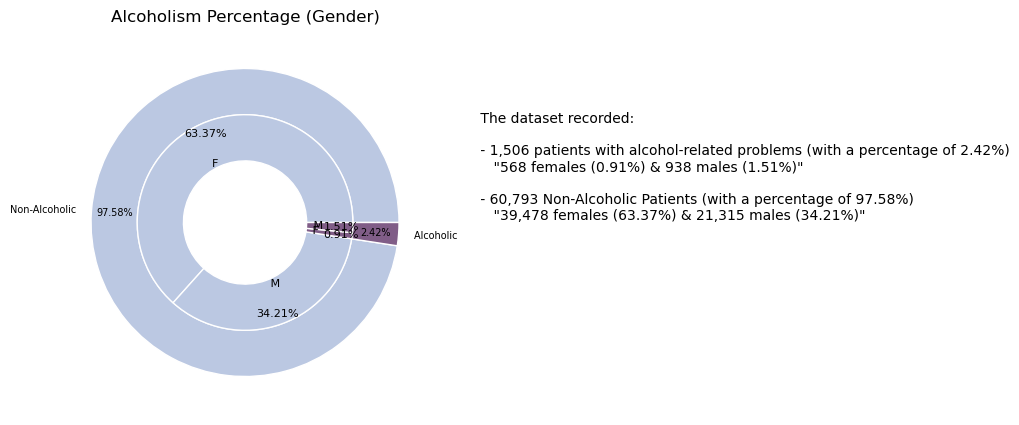

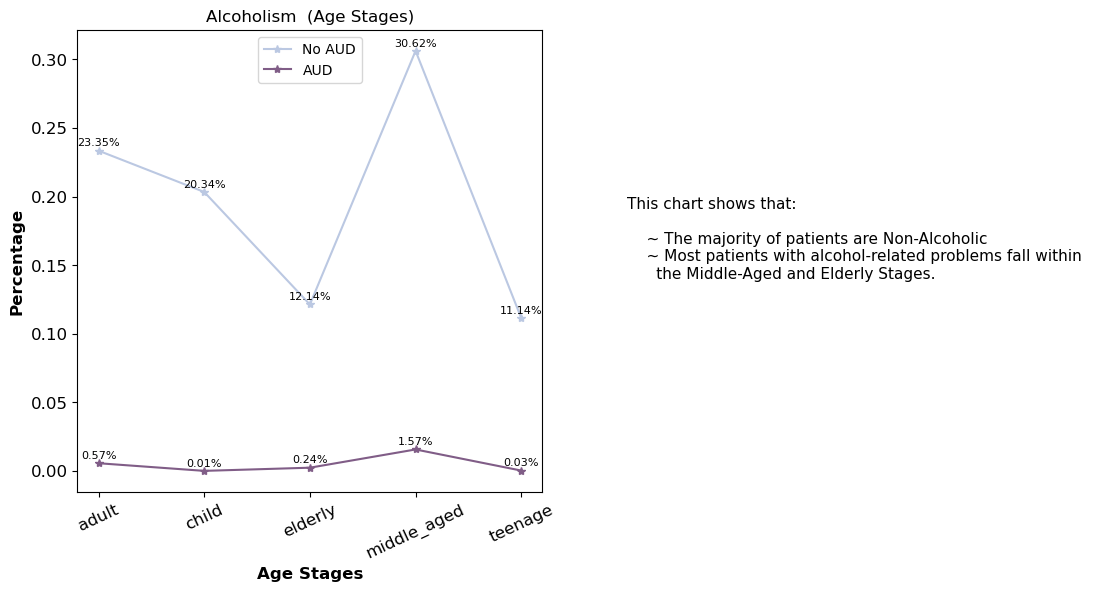

In [1352]:
# Visualizing Alcoholism "dm" Column:
# By Gender:
aud_count_g=df.groupby(['aud','gender']).patient_id.nunique()

size = 0.3
label_s = 'Non-Alcoholic','Alcoholic '
label_g = 'F',' M',' F',' M'
text = ''' The dataset recorded:\n\n - 1,506 patients with alcohol-related problems (with a percentage of 2.42%)
    "568 females (0.91%) & 938 males (1.51%)"\n
 - 60,793 Non-Alcoholic Patients (with a percentage of 97.58%)
    "39,478 females (63.37%) & 21,315 males (34.21%)" '''

plt.subplots(figsize = (5,5))

plt.pie(aud_count_g.groupby('aud').sum(), radius=1, colors= ['#bbc8e2','#805d87'],labels = label_s,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 7}, wedgeprops=dict(width=size, edgecolor='w'))

plt.pie(aud_count_g, radius=1-size, colors= ['#bbc8e2','#bbc8e2','#805d87','#805d87'],labels=label_g,autopct='%1.2f%%',pctdistance=.9,
        labeldistance=.6,textprops={'fontsize': 8},wedgeprops=dict(width=size, edgecolor='w'))

plt.title('Alcoholism Percentage (Gender)')
plt.text(1.5,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

# By Age Stages:
aud_count_a=df.groupby(['age_stages','aud']).patient_id.nunique().reset_index().rename(columns={'patient_id':"patient_count"})
aud_count_a['pct']=aud_count_a['patient_count']/aud_count_a['patient_count'].sum()
stages=aud_count_a.age_stages.unique().tolist()
aud_values = aud_count_a.aud.tolist()
aud_0=aud_count_a.query('aud==0').pct.tolist()
aud_1=aud_count_a.query('aud==1').pct.tolist()


note = '''This chart shows that:\n
    ~ The majority of patients are Non-Alcoholic
    ~ Most patients with alcohol-related problems fall within 
      the Middle-Aged and Elderly Stages.'''

plt.subplots(figsize = (6,6))

plt.plot(stages,aud_0,color='#bbc8e2', marker= '*', label= 'No AUD')
plt.plot(stages,aud_1,color='#805d87', marker= '*', label = 'AUD')

for i, v in enumerate(aud_0):
  plt.text(i,v+.002, f"{v:.2%}", ha='center', va='bottom',fontsize=8)

for i, v in enumerate(aud_1):
  plt.text(i,v+.002, f"{v:.2%}", ha='center', va='bottom',fontsize=8) 

plt.xticks(fontsize = 12, rotation = 25)
plt.yticks(fontsize = 12)
plt.xlabel('Age Stages',fontsize = 12, weight = 'bold')
plt.ylabel('Percentage',fontsize = 12, weight = 'bold')
plt.title('Alcoholism  (Age Stages)', fontsize =12)
plt.legend(loc="upper center",fontsize = 10)
plt.text(5,.2,note,ha='left',va='top',fontsize = 11, weight = 'normal')
plt.show();

In [1353]:
# Exploring patients with a handicap:
hcp_count=df.groupby(['age_stages','hcp','gender']).patient_id.nunique().reset_index().rename(columns={'patient_id':"count_patient"})
hcp_count['pct']=hcp_count['count_patient']/hcp_count['count_patient'].sum()
hcp_count.style.format({'pct':'{:,.2%}'})
df.groupby(['hcp','gender']).patient_id.nunique().reset_index().rename(columns={'patient_id':"count_patient"})

,hcp,gender,count_patient
0,0,F,39417
1,0,M,21749
2,1,F,629
3,1,M,504


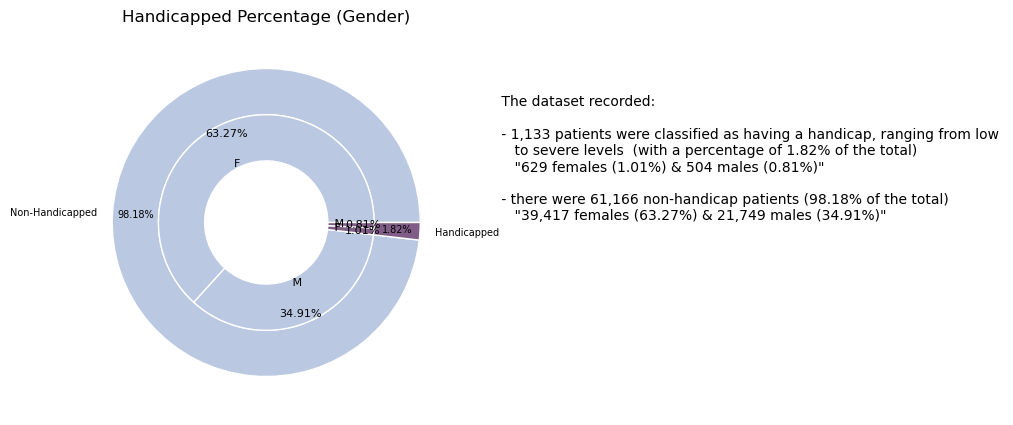

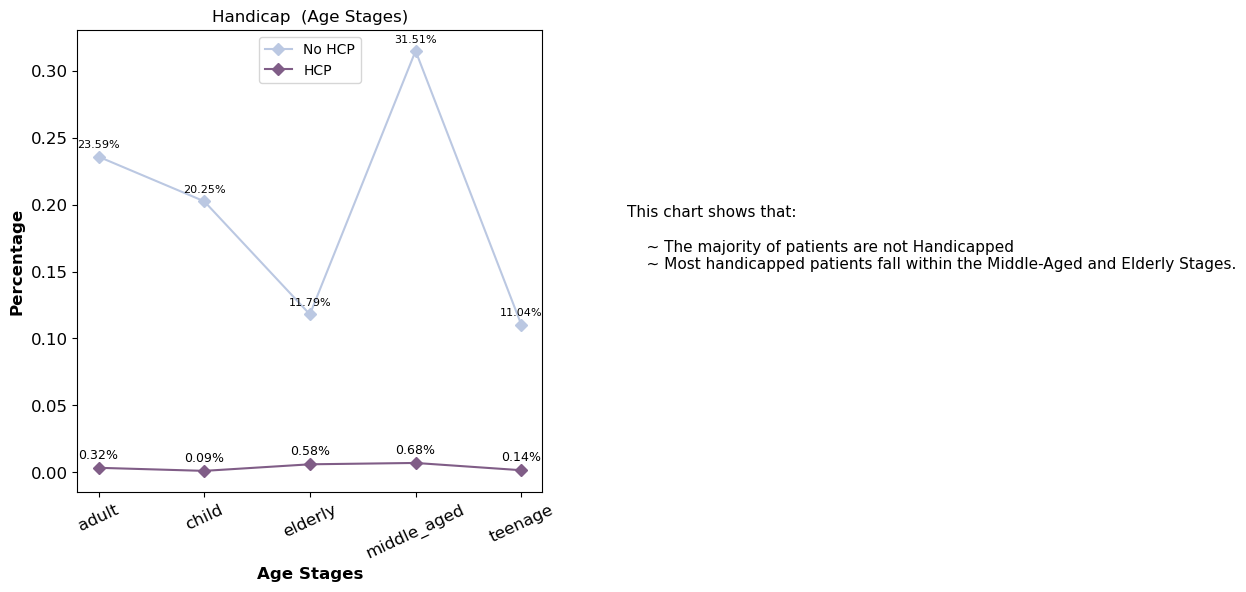

In [1354]:
# Visualizing Alcoholism "dm" Column:
# By Gender:
hcp_count_g=df.groupby(['hcp','gender']).patient_id.nunique()


size = 0.3
label_s = 'Non-Handicapped','Handicapped '
label_g = 'F',' M',' F',' M'
text = ''' The dataset recorded:\n\n - 1,133 patients were classified as having a handicap, ranging from low 
    to severe levels  (with a percentage of 1.82% of the total)
    "629 females (1.01%) & 504 males (0.81%)"\n
 - there were 61,166 non-handicap patients (98.18% of the total)
    "39,417 females (63.27%) & 21,749 males (34.91%)" '''

plt.subplots(figsize = (5,5))

plt.pie(hcp_count_g.groupby('hcp').sum(), radius=1, colors= ['#bbc8e2','#805d87'],labels = label_s,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 7}, wedgeprops=dict(width=size, edgecolor='w'))

plt.pie(hcp_count_g, radius=1-size, colors= ['#bbc8e2','#bbc8e2','#805d87','#805d87'],labels=label_g,autopct='%1.2f%%',pctdistance=.9,
        labeldistance=.6,textprops={'fontsize': 8},wedgeprops=dict(width=size, edgecolor='w'))

plt.title('Handicapped Percentage (Gender)')
plt.text(1.5,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

# By Age Stages:
hcp_count_a=df.groupby(['age_stages','hcp']).patient_id.nunique().reset_index().rename(columns={'patient_id':"patient_count"})
hcp_count_a['pct']=hcp_count_a['patient_count']/hcp_count_a['patient_count'].sum()
stages=hcp_count_a.age_stages.unique().tolist()
hcp_values = hcp_count_a.hcp.tolist()
hcp_0=hcp_count_a.query('hcp==0').pct.tolist()
hcp_1=hcp_count_a.query('hcp==1').pct.tolist()

note = '''This chart shows that:\n
    ~ The majority of patients are not Handicapped
    ~ Most handicapped patients fall within the Middle-Aged and Elderly Stages.'''

plt.subplots(figsize = (6,6))

plt.plot(stages,hcp_0,color='#bbc8e2', marker= "D", label= 'No HCP')
plt.plot(stages,hcp_1,color='#805d87', marker= "D", label = 'HCP')

for i, v in enumerate(hcp_0):
  plt.text(i,v+.005, f"{v:.2%}", ha='center', va='bottom',fontsize=8)

for i, v in enumerate(hcp_1):
  plt.text(i,v+.005, f"{v:.2%}", ha='center', va='bottom',fontsize=9) 

plt.xticks(fontsize = 12, rotation = 25)
plt.xlabel('Age Stages',fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12)
plt.ylabel('Percentage',fontsize = 12, weight = 'bold')
plt.title('Handicap  (Age Stages)', fontsize =12)
plt.legend(loc="upper center",fontsize = 10)
plt.text(5,.2,note,ha='left',va='top',fontsize = 11, weight = 'normal')
plt.show();

In [1355]:
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,appoint_gap,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,same_day,middle_aged,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [1356]:
df.groupby('sms_received').appoint_id.count().reset_index().rename(columns={'appoint_id':"appointments_number"})

,sms_received,appointments_number
0,0,75045
1,1,35482


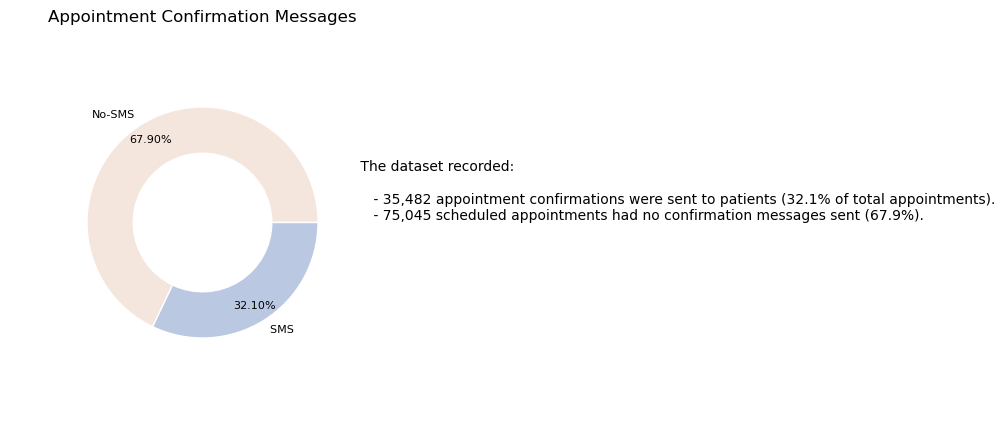

In [1357]:
# Visualizing sms_received Column:
sms_count=df.groupby('sms_received').appoint_id.count()
size = 0.3
label_s = 'No-SMS','SMS '

text = ''' The dataset recorded:\n
    - 35,482 appointment confirmations were sent to patients (32.1% of total appointments).
    - 75,045 scheduled appointments had no confirmation messages sent (67.9%).'''

plt.subplots(figsize = (5,5))

plt.pie(sms_count, radius=.75, colors= ['#f4e5dd','#bbc8e2'],labels = label_s,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 8}, wedgeprops=dict(width=size, edgecolor='w'))

plt.title('Appointment Confirmation Messages')
plt.text(1,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [1358]:
df.groupby('no_show').appoint_id.count().reset_index().rename(columns={'appoint_id':"appointments_number"})

,no_show,appointments_number
0,No,88208
1,Yes,22319


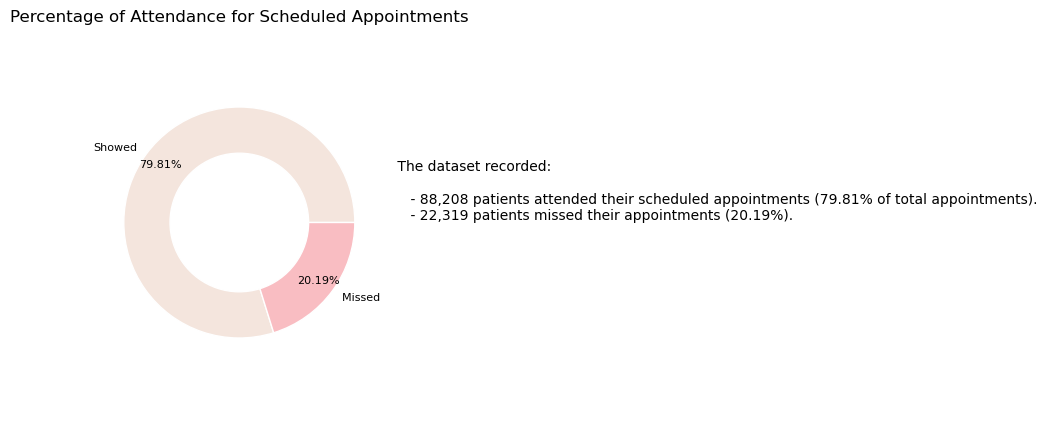

In [1359]:
# Visualizing no_show Column:
show_count=df.groupby('no_show').appoint_id.count()
size = 0.3
label_s = 'Showed','Missed '

text = ''' The dataset recorded:\n
    - 88,208 patients attended their scheduled appointments (79.81% of total appointments).
    - 22,319 patients missed their appointments (20.19%).'''

plt.subplots(figsize = (5,5))

plt.pie(show_count, radius=.75, colors= ['#f4e5dd','#f9bdc2'],labels = label_s,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 8}, wedgeprops=dict(width=size, edgecolor='w'))

plt.title('Percentage of Attendance for Scheduled Appointments')
plt.text(1,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

### Questions to be asked:
1. Do gender differences impact showing up to the appointment?
2. Does the time between the scheduled date and the appointment date impact the likelihood of showing up?
3. Does the patient's age affect their likelihood of attending their appointment?
4. What is the impact of the neighborhood on the level of commitment to showing up for appointments?
5. Is there a relationship between acquiring the Bolsa Família scholarship and the percentage of attendance?
6. Does a diagnosis of hypertension, diabetes, alcoholism, or disability impact the level of appointment attendance?
7. Does receiving messages impact patients' likelihood of attending their appointments?

#### Q1. Do gender differences impact showing up to the appointment?

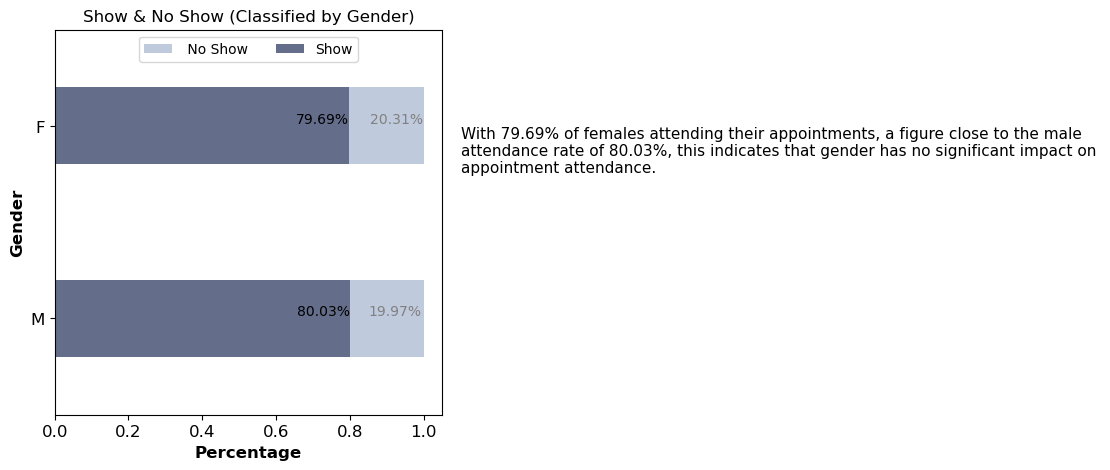

In [1362]:
appoint_count_g=df.groupby('gender').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_count_g['pct']=appoint_count_g.num_appointments/appoint_count_g.num_appointments

appoint_show_g= df.query('no_show == "No"').groupby('gender').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_show_g['pct']=appoint_show_g.num_appointments/appoint_count_g.num_appointments

note = '''With 79.69% of females attending their appointments, a figure close to the male 
attendance rate of 80.03%, this indicates that gender has no significant impact on 
appointment attendance.'''

plt.subplots(figsize = (5,5))

sns.barplot(x=appoint_count_g.pct,y=appoint_show_g.gender.tolist() ,color='#bbc8e2',label=" No Show",width=.4)
sns.barplot(x=appoint_show_g.pct,y=appoint_show_g.gender.tolist(),color = "#5e6b91", label= "Show",width=.4)

for i, v in enumerate(appoint_count_g.pct-appoint_show_g.pct):
  plt.text(v+.65,i, f"{v:.2%}", ha='left', va='bottom',fontsize=10,color="#808080")

for i, v in enumerate(appoint_show_g.pct):
  plt.text(v,i, f"{v:.2%}", ha='right', va='bottom',fontsize=10)

plt.xticks(fontsize = 12)
plt.xlabel('Percentage',fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12)
plt.ylabel('Gender',fontsize = 12,weight = 'bold')
plt.title('Show & No Show (Classified by Gender)', fontsize =12)
plt.legend(ncol=2,loc="upper center",fontsize = 10)
plt.text(1.1,0,note,ha='left',va='top',fontsize = 11, weight = 'normal')
plt.show();


#### Q2. Does the time between the scheduled date and the appointment date impact the likelihood of showing up?

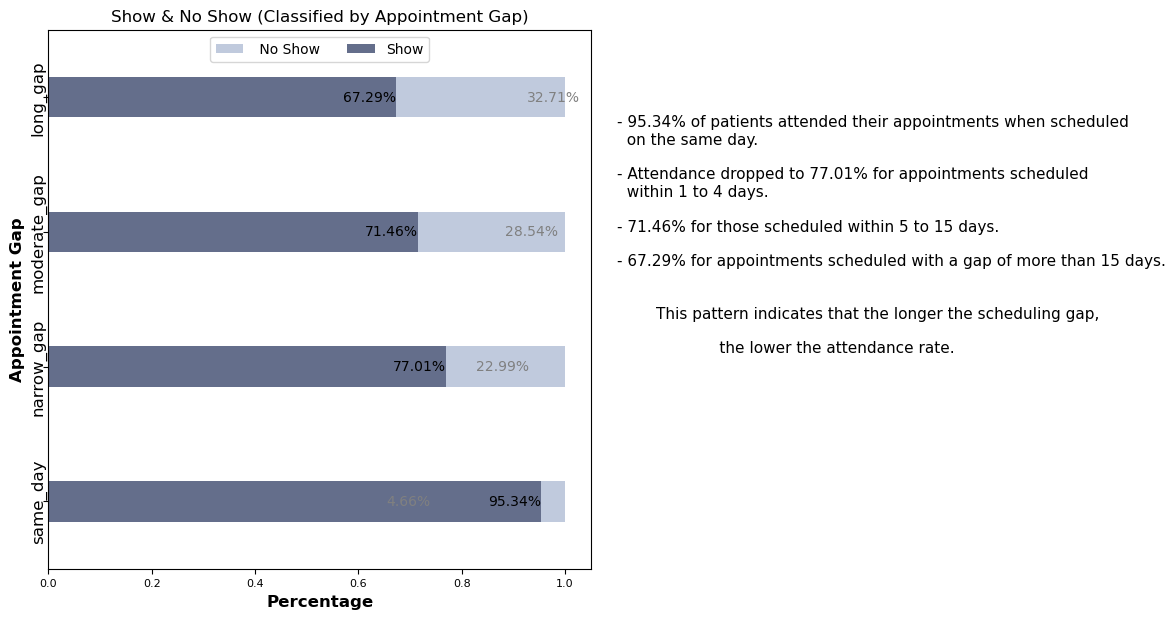

In [1364]:
appoint_count_a=df.groupby('appoint_gap').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_count_a['pct']=appoint_count_a.num_appointments/appoint_count_a.num_appointments

appoint_show_a= df.query('no_show == "No"').groupby('appoint_gap').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_show_a['pct']=appoint_show_a.num_appointments/appoint_count_a.num_appointments

note = '''
- 95.34% of patients attended their appointments when scheduled 
  on the same day.\n 
- Attendance dropped to 77.01% for appointments scheduled 
  within 1 to 4 days.\n
- 71.46% for those scheduled within 5 to 15 days.\n
- 67.29% for appointments scheduled with a gap of more than 15 days.\n\n 
        This pattern indicates that the longer the scheduling gap,\n 
                     the lower the attendance rate.'''

plt.subplots(figsize = (7,7))

sns.barplot(x=appoint_count_a.pct,y=appoint_show_a.appoint_gap.tolist() ,color='#bbc8e2',label=" No Show",width=.3)
sns.barplot(x=appoint_show_a.pct,y=appoint_show_a.appoint_gap.tolist(),color = "#5e6b91", label= "Show",width=.3)

for i, v in enumerate(appoint_count_a.pct-appoint_show_a.pct):
  plt.text(v+.65,i, f"{v:.2%}", ha='center', va='center',fontsize=10,color="#808080")

for i, v in enumerate(appoint_show_a.pct):
  plt.text(v,i, f"{v:.2%}", ha='right', va='center',fontsize=10)

plt.xticks(fontsize = 8)
plt.xlabel('Percentage',fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12, rotation = 90, ha='center',va='center')
plt.ylabel('Appointment Gap',fontsize = 12,weight = 'bold')
plt.title('Show & No Show (Classified by Appointment Gap)', fontsize =12)
plt.legend(ncol=2,loc="upper center",fontsize = 10)
plt.text(1.1,0,note,ha='left',va='top',fontsize = 11, weight = 'normal')
plt.show();

#### Q3. Does the patient's age affect their likelihood of attending their appointment?


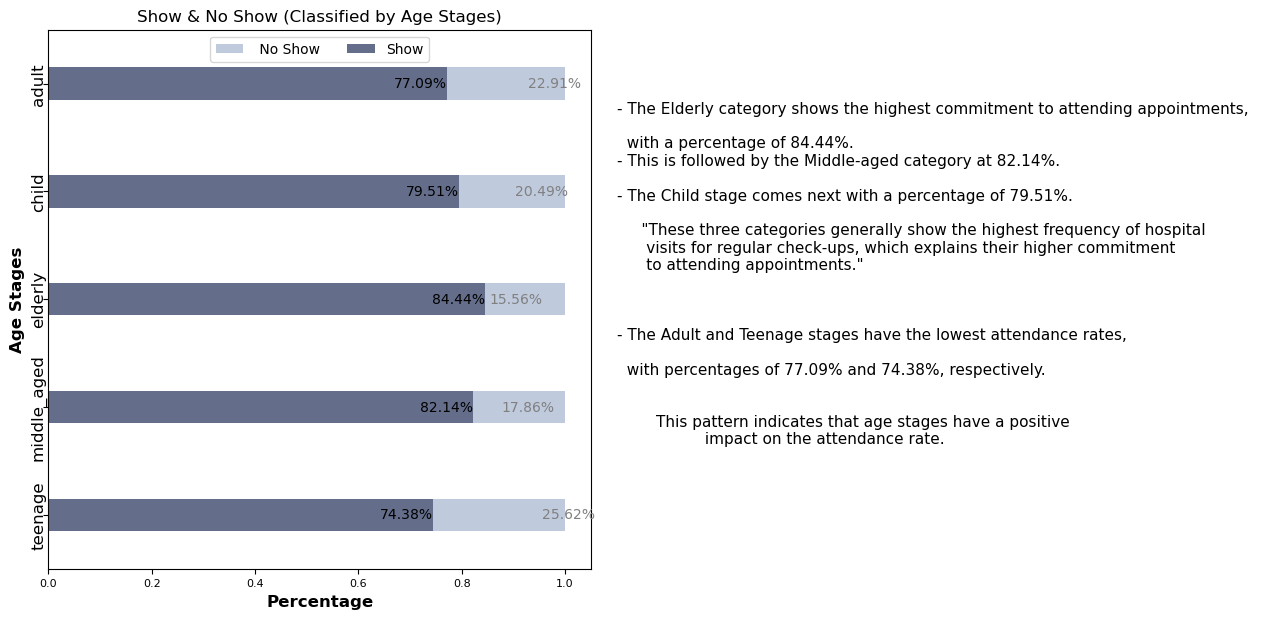

In [1366]:
appoint_count_s=df.groupby('age_stages').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_count_s['pct']=appoint_count_s.num_appointments/appoint_count_s.num_appointments

appoint_show_s= df.query('no_show == "No"').groupby('age_stages').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_show_s['pct']=appoint_show_s.num_appointments/appoint_count_s.num_appointments

note = '''
- The Elderly category shows the highest commitment to attending appointments, \n
  with a percentage of 84.44%.
- This is followed by the Middle-aged category at 82.14%.\n
- The Child stage comes next with a percentage of 79.51%.\n
     "These three categories generally show the highest frequency of hospital 
      visits for regular check-ups, which explains their higher commitment 
      to attending appointments."\n\n\n
- The Adult and Teenage stages have the lowest attendance rates,\n
  with percentages of 77.09% and 74.38%, respectively.\n\n
        This pattern indicates that age stages have a positive 
                  impact on the attendance rate.'''

plt.subplots(figsize = (7,7))

sns.barplot(x=appoint_count_s.pct,y=appoint_count_s.age_stages.tolist() ,color='#bbc8e2',label=" No Show",width=.3)
sns.barplot(x=appoint_show_s.pct,y=appoint_show_s.age_stages.tolist(),color = "#5e6b91", label= "Show",width=.3)

for i, v in enumerate(appoint_count_s.pct-appoint_show_s.pct):
  plt.text(v+.75,i, f"{v:.2%}", ha='center', va='center',fontsize=10,color="#808080")

for i, v in enumerate(appoint_show_s.pct):
  plt.text(v,i, f"{v:.2%}", ha='right', va='center',fontsize=10)

plt.xticks(fontsize = 8)
plt.xlabel('Percentage',fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12, rotation = 90, ha='center',va='center')
plt.ylabel('Age Stages',fontsize = 12,weight = 'bold')
plt.title('Show & No Show (Classified by Age Stages)', fontsize =12)
plt.legend(ncol=2,loc="upper center",fontsize = 10)
plt.text(1.1,0,note,ha='left',va='top',fontsize = 11, weight = 'normal')
plt.show();


#### Q4. What is the impact of the neighborhood on the level of commitment to showing up for appointments?

In [1369]:
# The Total Appointments scheduled are distributed on 81 Neighbourhoods:
appoint_count_n=df.groupby('neighbourhood').appoint_id.count()
appoint_count_n=appoint_count_n.sort_values()
appoint_count_n = appoint_count_n.reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_count_n.sort_values('neighbourhood')

,neighbourhood,num_appointments
2,AEROPORTO,8
63,ANDORINHAS,2262
14,ANTÔNIO HONÓRIO,271
15,ARIOVALDO FAVALESSA,282
21,BARRO VERMELHO,423
...,...,...
59,SÃO JOSÉ,1977
66,SÃO PEDRO,2448
74,TABUAZEIRO,3132
9,UNIVERSITÁRIO,152


In [1371]:
# The total attended appointments are distributed into 80 Neigbourhoods:
appoint_show_N= df.query('no_show == "No"').groupby('neighbourhood').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_show_N.shape

(80, 2)

In [1372]:
# Determining the missing neighbourhood:
set1 = set(appoint_count_n['neighbourhood'])
set2 = set(appoint_show_N['neighbourhood'])
only_in_df1 = set1 - set2
only_in_df1


{'ILHAS OCEÂNICAS DE TRINDADE'}

In [1373]:
# The Scheduled appointments at "ILHAS OCEÂNICAS DE TRINDADE" Neighbourhood weren't attended by patients:
# Add Row for "ILHAS OCEÂNICAS DE TRINDADE" with 0 value.
appoint_show_n= df.query('no_show == "No"').groupby('neighbourhood').appoint_id.count()
appoint_show_n['ILHAS OCEÂNICAS DE TRINDADE'] = 0
appoint_show_n=appoint_show_n.sort_values()
appoint_show_n = appoint_show_n.reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_show_n.sort_values('neighbourhood')

,neighbourhood,num_appointments
2,AEROPORTO,7
63,ANDORINHAS,1741
15,ANTÔNIO HONÓRIO,221
14,ARIOVALDO FAVALESSA,220
22,BARRO VERMELHO,332
...,...,...
59,SÃO JOSÉ,1549
66,SÃO PEDRO,1933
73,TABUAZEIRO,2559
9,UNIVERSITÁRIO,120


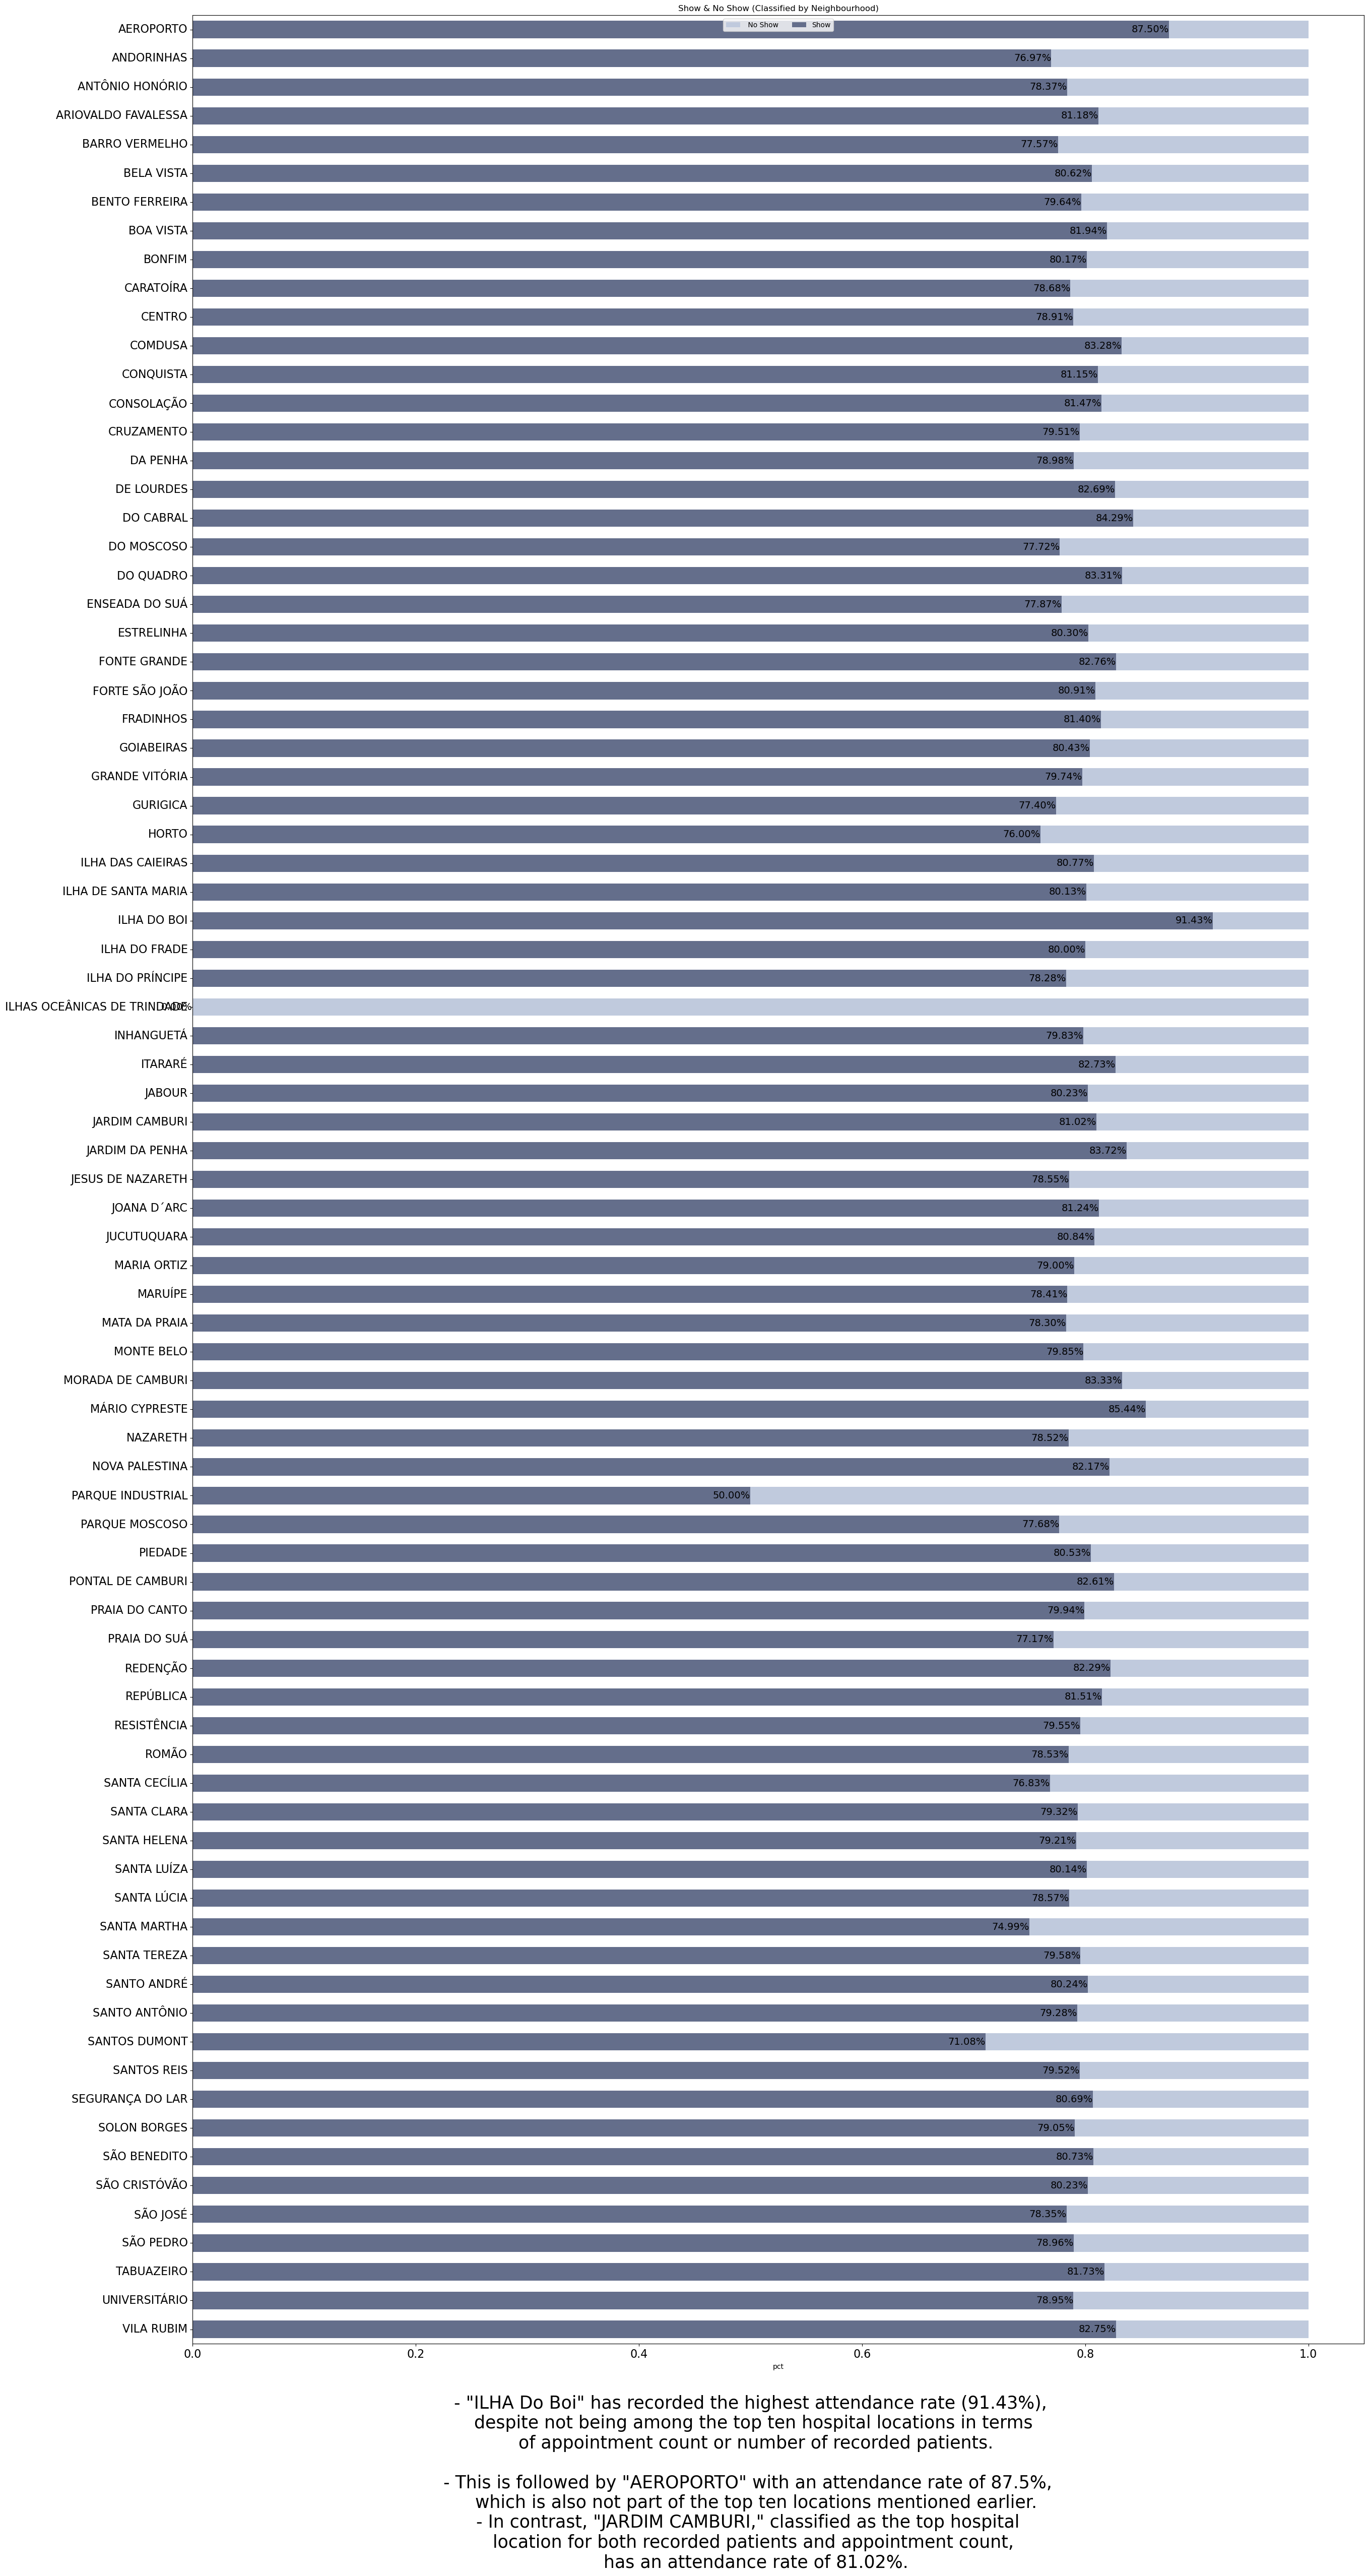

In [1374]:
appoint_count_n['pct']=appoint_count_n.sort_values('neighbourhood').num_appointments/appoint_count_n.sort_values('neighbourhood').num_appointments
appoint_show_n['pct']=appoint_show_n.sort_values('neighbourhood').num_appointments/appoint_count_n.sort_values('neighbourhood').num_appointments

note = '''
- "ILHA Do Boi" has recorded the highest attendance rate (91.43%),
  despite not being among the top ten hospital locations in terms 
  of appointment count or number of recorded patients.\n 
- This is followed by "AEROPORTO" with an attendance rate of 87.5%, 
  which is also not part of the top ten locations mentioned earlier.
- In contrast, "JARDIM CAMBURI," classified as the top hospital 
  location for both recorded patients and appointment count, 
  has an attendance rate of 81.02%.'''

plt.subplots(figsize = (30,60))

sns.barplot(x=appoint_count_n.sort_values('neighbourhood').pct,y=appoint_count_n.sort_values('neighbourhood').neighbourhood.tolist() ,
            color='#bbc8e2',label=" No Show",width=.6)
sns.barplot(x=appoint_show_n.sort_values('neighbourhood').pct,y=appoint_count_n.sort_values('neighbourhood').neighbourhood.tolist(),
            color = "#5e6b91", label= "Show",width=.6)


for i, v in enumerate(appoint_show_n.sort_values('neighbourhood').pct):
  plt.text(v,i, f"{v:.2%}", ha='right', va='center',fontsize=14)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16, rotation = 0, va='center')
plt.title('Show & No Show (Classified by Neighbourhood)', fontsize =12)
plt.legend(ncol=2,loc="upper center",fontsize = 10)
plt.text(.5,85,note,ha='center',va='center',fontsize =25, weight = 'normal')
plt.show();

In [1367]:
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,appoint_gap,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,same_day,middle_aged,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Q5. Is there a relationship between acquiring the Bolsa Família scholarship and the percentage of attendance?

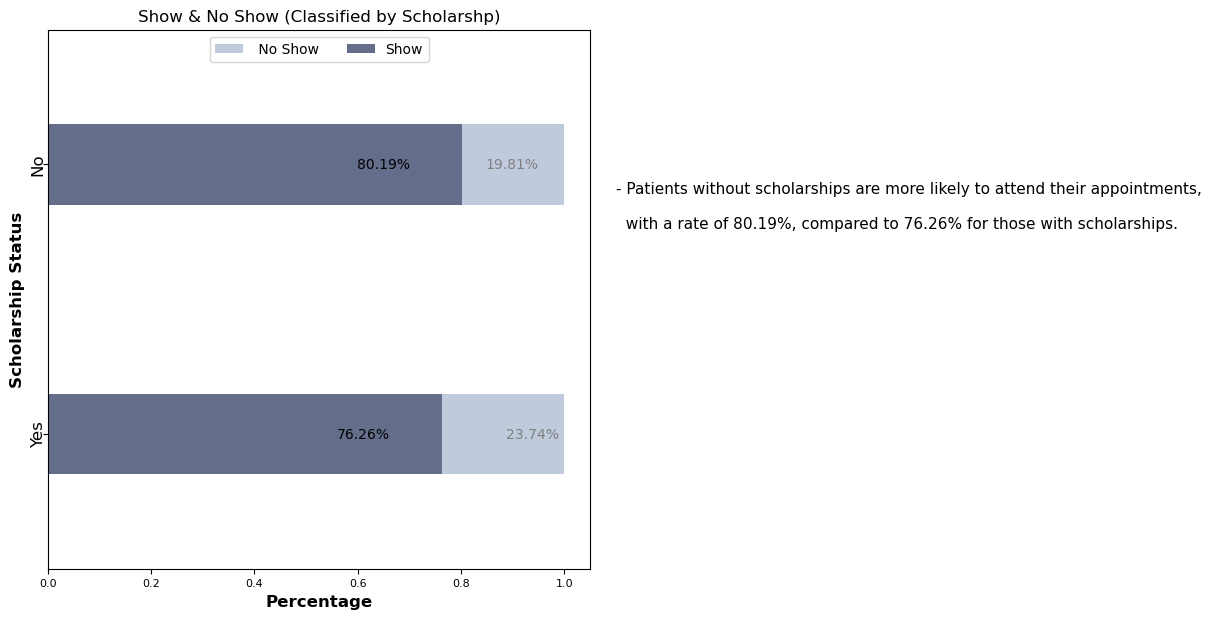

In [1491]:
appoint_count_s=df.groupby('scholarship').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_count_s['pct']=appoint_count_s.num_appointments/appoint_count_s.num_appointments

appoint_show_s= df.query('no_show == "No"').groupby('scholarship').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_show_s['pct']=appoint_show_s.num_appointments/appoint_count_s.num_appointments

note = '''
- Patients without scholarships are more likely to attend their appointments,\n 
  with a rate of 80.19%, compared to 76.26% for those with scholarships.'''

plt.subplots(figsize = (7,7))

sns.barplot(x=appoint_count_s.pct,y=['No','Yes'] ,color='#bbc8e2',label=" No Show",width=.3)
sns.barplot(x=appoint_show_s.pct,y=['No','Yes'],color = "#5e6b91", label= "Show",width=.3)

for i, v in enumerate(appoint_count_s.pct-appoint_show_s.pct):
  plt.text(v+.7,i, f"{v:.2%}", ha='center', va='center',fontsize=10,color="#808080")

for i, v in enumerate(appoint_show_s.pct):
  plt.text(v-.1,i, f"{v:.2%}", ha='right', va='center',fontsize=10)

plt.xticks(fontsize = 8)
plt.xlabel('Percentage',fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12, rotation = 90, ha='center',va='center')
plt.ylabel('Scholarship Status',fontsize = 12,weight = 'bold')
plt.title('Show & No Show (Classified by Scholarshp)', fontsize =12)
plt.legend(ncol=2,loc="upper center",fontsize = 10)
plt.text(1.1,0,note,ha='left',va='top',fontsize = 11, weight = 'normal')
plt.show();

#### Q6. Does a diagnosis of hypertension, diabetes, alcoholism, or disability impact the level of appointment attendance?

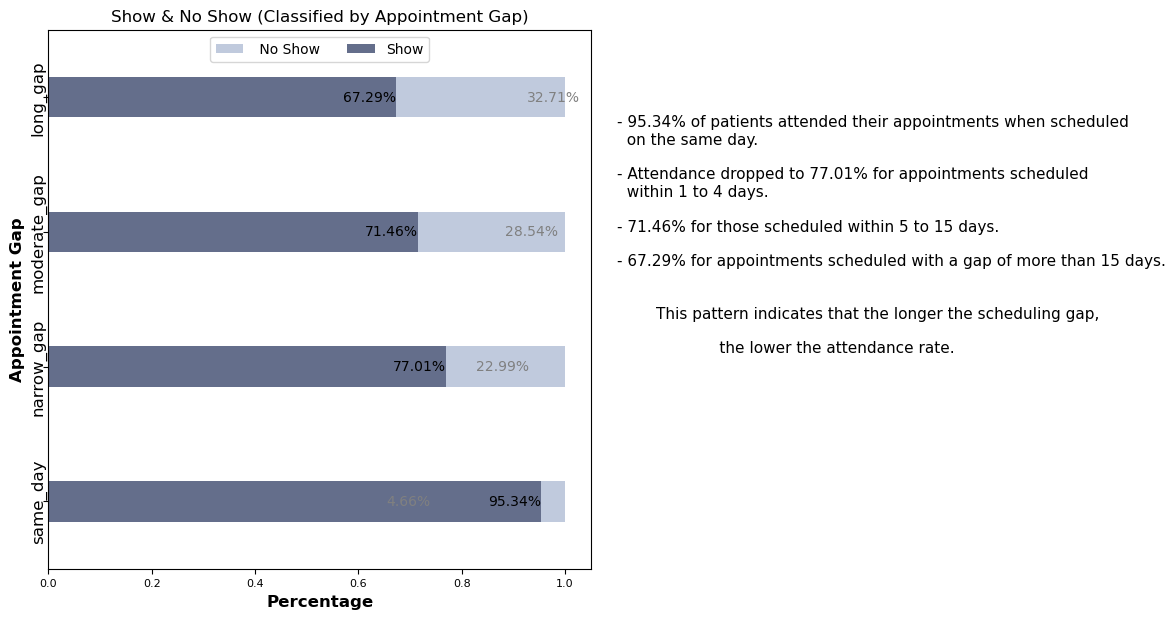

In [1378]:
appoint_count_a=df.groupby('appoint_gap').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_count_a['pct']=appoint_count_a.num_appointments/appoint_count_a.num_appointments

appoint_show_a= df.query('no_show == "No"').groupby('appoint_gap').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_show_a['pct']=appoint_show_a.num_appointments/appoint_count_a.num_appointments

note = '''
- 95.34% of patients attended their appointments when scheduled 
  on the same day.\n 
- Attendance dropped to 77.01% for appointments scheduled 
  within 1 to 4 days.\n
- 71.46% for those scheduled within 5 to 15 days.\n
- 67.29% for appointments scheduled with a gap of more than 15 days.\n\n 
        This pattern indicates that the longer the scheduling gap,\n 
                     the lower the attendance rate.'''

plt.subplots(figsize = (7,7))

sns.barplot(x=appoint_count_a.pct,y=appoint_show_a.appoint_gap.tolist() ,color='#bbc8e2',label=" No Show",width=.3)
sns.barplot(x=appoint_show_a.pct,y=appoint_show_a.appoint_gap.tolist(),color = "#5e6b91", label= "Show",width=.3)

for i, v in enumerate(appoint_count_a.pct-appoint_show_a.pct):
  plt.text(v+.65,i, f"{v:.2%}", ha='center', va='center',fontsize=10,color="#808080")

for i, v in enumerate(appoint_show_a.pct):
  plt.text(v,i, f"{v:.2%}", ha='right', va='center',fontsize=10)

plt.xticks(fontsize = 8)
plt.xlabel('Percentage',fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12, rotation = 90, ha='center',va='center')
plt.ylabel('Appointment Gap',fontsize = 12,weight = 'bold')
plt.title('Show & No Show (Classified by Appointment Gap)', fontsize =12)
plt.legend(ncol=2,loc="upper center",fontsize = 10)
plt.text(1.1,0,note,ha='left',va='top',fontsize = 11, weight = 'normal')
plt.show();

#### Q7. Does receiving messages impact patients' likelihood of attending their appointments?

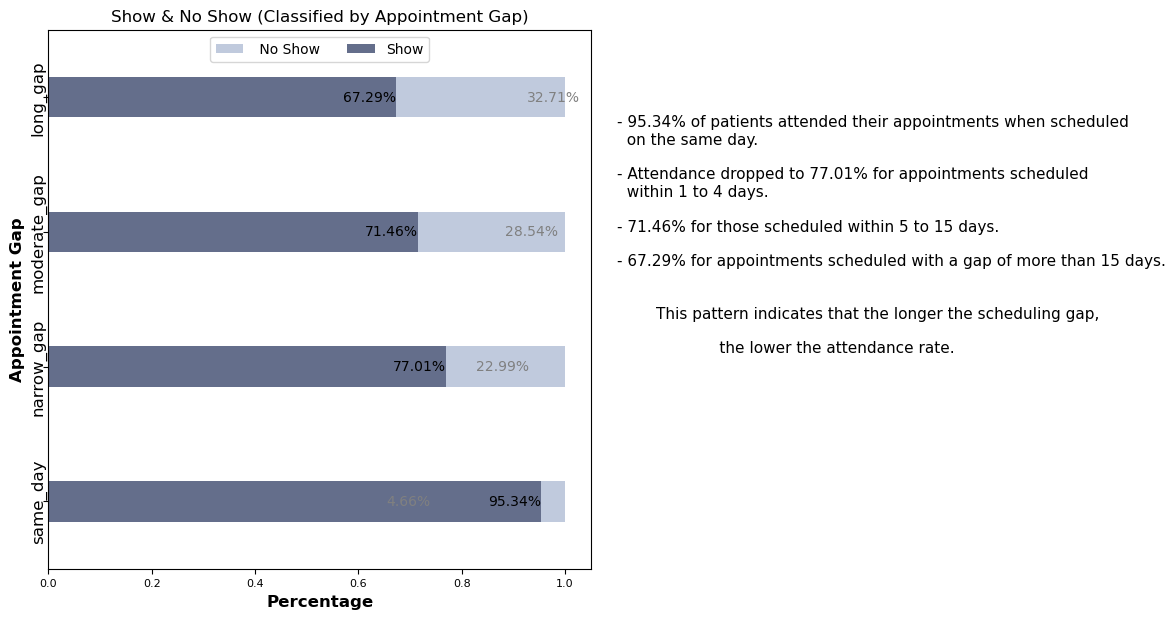

In [1380]:
appoint_count_a=df.groupby('appoint_gap').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_count_a['pct']=appoint_count_a.num_appointments/appoint_count_a.num_appointments

appoint_show_a= df.query('no_show == "No"').groupby('appoint_gap').appoint_id.count().reset_index().rename(columns={'appoint_id':'num_appointments'})
appoint_show_a['pct']=appoint_show_a.num_appointments/appoint_count_a.num_appointments

note = '''
- 95.34% of patients attended their appointments when scheduled 
  on the same day.\n 
- Attendance dropped to 77.01% for appointments scheduled 
  within 1 to 4 days.\n
- 71.46% for those scheduled within 5 to 15 days.\n
- 67.29% for appointments scheduled with a gap of more than 15 days.\n\n 
        This pattern indicates that the longer the scheduling gap,\n 
                     the lower the attendance rate.'''

plt.subplots(figsize = (7,7))

sns.barplot(x=appoint_count_a.pct,y=appoint_show_a.appoint_gap.tolist() ,color='#bbc8e2',label=" No Show",width=.3)
sns.barplot(x=appoint_show_a.pct,y=appoint_show_a.appoint_gap.tolist(),color = "#5e6b91", label= "Show",width=.3)

for i, v in enumerate(appoint_count_a.pct-appoint_show_a.pct):
  plt.text(v+.65,i, f"{v:.2%}", ha='center', va='center',fontsize=10,color="#808080")

for i, v in enumerate(appoint_show_a.pct):
  plt.text(v,i, f"{v:.2%}", ha='right', va='center',fontsize=10)

plt.xticks(fontsize = 8)
plt.xlabel('Percentage',fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12, rotation = 90, ha='center',va='center')
plt.ylabel('Appointment Gap',fontsize = 12,weight = 'bold')
plt.title('Show & No Show (Classified by Appointment Gap)', fontsize =12)
plt.legend(ncol=2,loc="upper center",fontsize = 10)
plt.text(1.1,0,note,ha='left',va='top',fontsize = 11, weight = 'normal')
plt.show();